In [1]:
suppressPackageStartupMessages(library(SingleCellExperiment))
suppressPackageStartupMessages(library(scater))
suppressPackageStartupMessages(library(scran))
suppressPackageStartupMessages(library('dplyr'))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library('limma'))
suppressPackageStartupMessages(library('cowplot'))
library("Rtsne")
suppressPackageStartupMessages(library(org.Hs.eg.db))
options(stringsAsFactors = FALSE)
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library("CONICSmat"))
suppressPackageStartupMessages(library("ggthemes"))
suppressPackageStartupMessages(library("ggbeeswarm"))
suppressPackageStartupMessages(library("monocle"))

In [2]:
all_data <- readRDS("All_DEANTA_withallnormal3_required_filtered_oldtSNE_ccseurat_clusters_with_pagoda.rds")

In [8]:
all_data <- readRDS("All_DEANTA_withallnormal3_required_filtered_oldtSNE_ccseurat_clusters_with_pagoda.rds")

In [10]:
pruned_data <- all_data[which(rownames(all_data) %in% colnames(proper_counts_norm)),]
pruned_data

class: SingleCellExperiment 
dim: 53916 3562 
metadata(0):
assays(3): counts logcounts logcounts_raw
rownames(53916): TSPAN6 TNMD ... ENSG00000273492 ENSG00000273493
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(3562):
  X170328_NB501311_0063_AHHHJ3BGX2_DEANTA3.1_TALL_040716_plate7_E3_rep_1_NA
  X171020_NB501311_0140_AHGLGFBGX3_DEANTA3.1_TALL_092517_plate2_E9_rep_1_NA
  ...
  X180323_NB501311_0213_AHLYW7BGX5_DEANTA1_TALL_031418_plate3_B5_rep_1_NA
  X170104_NB501311_0047_AHY73GBGXY_DEANTA1_TALL_041913_plate8_B3_rep_1_NA
colData names(72): sampleName SeqDate ... pagoda_walktrap
  pagoda_multilevel
reducedDimNames(4): allPCApd oldtSNE pagoda_largeVIS pagoda_tSNE
spikeNames(4): MT RP HKG RNA5S

In [11]:
scaled_data <- scale(proper_counts_norm ,scale=TRUE)
max(scaled_data)
min(scaled_data)

assay(pruned_data,"scaledval") <- t(scaled_data)

[1] 59.66574

[1] -10.00548

[1] 3.081805

[1] 0

[1] 3562

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

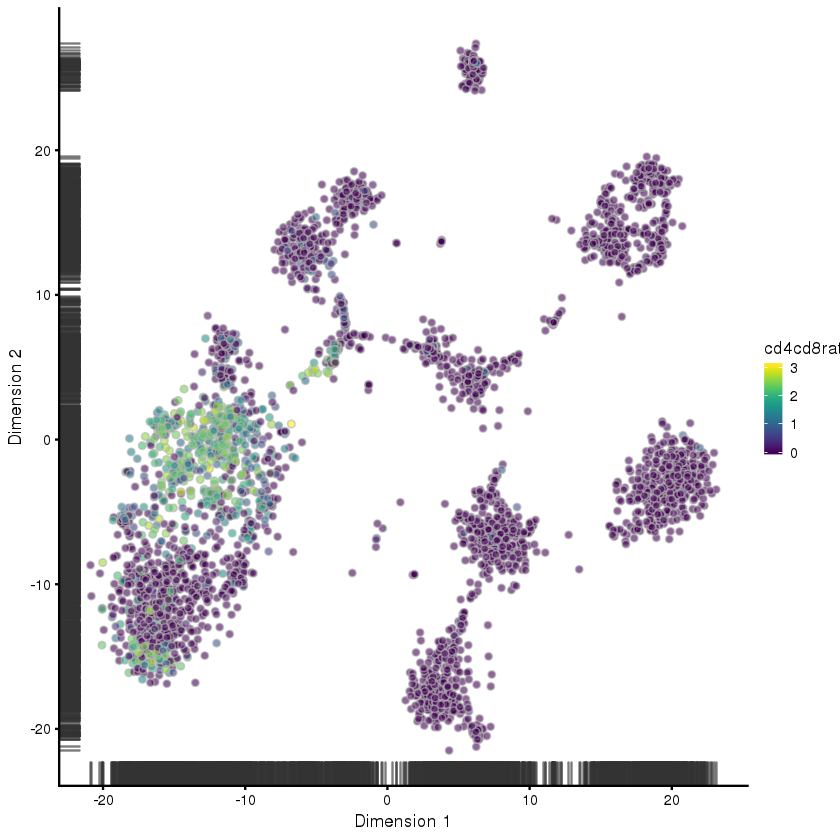

In [12]:
cd8a_exp <- assay(pruned_data,"scaledval")["CD8A",]
cd8a_exp[cd8a_exp < 0] = 0
cd8b_exp <- assay(pruned_data,"scaledval")["CD8B",]
cd8b_exp[cd8b_exp < 0] = 0
avg_cd8_exp_zscore <- (cd8a_exp + cd8b_exp)/2
cd4_exp <- assay(pruned_data,"scaledval")["CD4",]
cd4_exp[cd4_exp < 0] = 0
cd8_cd4_zscore_ratio <- avg_cd8_exp_zscore /(cd4_exp+1)
max(cd8_cd4_zscore_ratio)
min(cd8_cd4_zscore_ratio)
length(cd8_cd4_zscore_ratio)
colData(pruned_data)$cd4cd8ratio <- cd8_cd4_zscore_ratio
plotReducedDim(pruned_data,"pagoda_tSNE",ncomponents = 2,by_exprs_values = "logcounts", colour_by = "cd4cd8ratio")

In [13]:
onlyCD8_cells_withclus9 <- pruned_data[,which(pruned_data$cd4cd8ratio > 1)]
onlyCD8_cells_withclus9

class: SingleCellExperiment 
dim: 53916 580 
metadata(0):
assays(4): counts logcounts logcounts_raw scaledval
rownames(53916): TSPAN6 TNMD ... ENSG00000273492 ENSG00000273493
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(580):
  X170328_NB501311_0063_AHHHJ3BGX2_DEANTA3.1_TALL_040716_plate7_E3_rep_1_NA
  X181005_NB501311_0312_AH2WG2BGX9_DEANTA0_CD8_Tcell_092418_plate1_B1_S290_rep1_NA
  ...
  X180706_NB501311_0266_AH552FBGX7_PBMC_TBMG_070218_plate1_B3_S17_rep1_NA
  X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092818_plate1_B2_S106_rep1_NA
colData names(73): sampleName SeqDate ... pagoda_multilevel cd4cd8ratio
reducedDimNames(4): allPCApd oldtSNE pagoda_largeVIS pagoda_tSNE
spikeNames(4): MT RP HKG RNA5S

In [14]:
`%nin%` = Negate(`%in%`)
exclude <- c("cluster9")

In [15]:
onlyCD8_cells <- onlyCD8_cells_withclus9[,which(onlyCD8_cells_withclus9$pagoda_multilevel %nin% exclude)]
onlyCD8_cells

class: SingleCellExperiment 
dim: 53916 548 
metadata(0):
assays(4): counts logcounts logcounts_raw scaledval
rownames(53916): TSPAN6 TNMD ... ENSG00000273492 ENSG00000273493
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(548):
  X170328_NB501311_0063_AHHHJ3BGX2_DEANTA3.1_TALL_040716_plate7_E3_rep_1_NA
  X181005_NB501311_0312_AH2WG2BGX9_DEANTA0_CD8_Tcell_092418_plate1_B1_S290_rep1_NA
  ...
  X180706_NB501311_0266_AH552FBGX7_PBMC_TBMG_070218_plate1_B3_S17_rep1_NA
  X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092818_plate1_B2_S106_rep1_NA
colData names(73): sampleName SeqDate ... pagoda_multilevel cd4cd8ratio
reducedDimNames(4): allPCApd oldtSNE pagoda_largeVIS pagoda_tSNE
spikeNames(4): MT RP HKG RNA5S

In [16]:
d <- counts(onlyCD8_cells)
dim(d)
colnames(d) <- 1:ncol(d)
geneNames <- rownames(d)
rownames(d) <- 1:nrow(d)
pd <- data.frame(walktrap = onlyCD8_cells$pagoda_walktrap, cellcycle = onlyCD8_cells$Phase, patient = onlyCD8_cells$individual, cellNames=colnames(onlyCD8_cells), num_genes_expressed=onlyCD8_cells$total_features)
pd <- new("AnnotatedDataFrame", data=pd)
fd <- data.frame(gene_short_name = geneNames)
fd <- new("AnnotatedDataFrame", data=fd)

dCellData <- newCellDataSet(d, phenoData = pd, featureData = fd, expressionFamily = negbinomial.size())
dCellData
HSMM <- detectGenes(dCellData, min_expr = 0.1)
print(head(fData(HSMM)))

[1] 53916   548

CellDataSet (storageMode: environment)
assayData: 53916 features, 548 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 1 2 ... 548 (548 total)
  varLabels: walktrap cellcycle ... Size_Factor (6 total)
  varMetadata: labelDescription
featureData
  featureNames: 1 2 ... 53916 (53916 total)
  fvarLabels: gene_short_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

  gene_short_name num_cells_expressed
1          TSPAN6                   3
2            TNMD                   0
3            DPM1                  93
4           SCYL3                  57
5        C1orf112                  23
6             FGR                 166


In [17]:
HSMM <- estimateSizeFactors(HSMM)
HSMM <- estimateDispersions(HSMM)

Warning message:
“glm.fit: algorithm did not converge”Removing 824 outliers


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

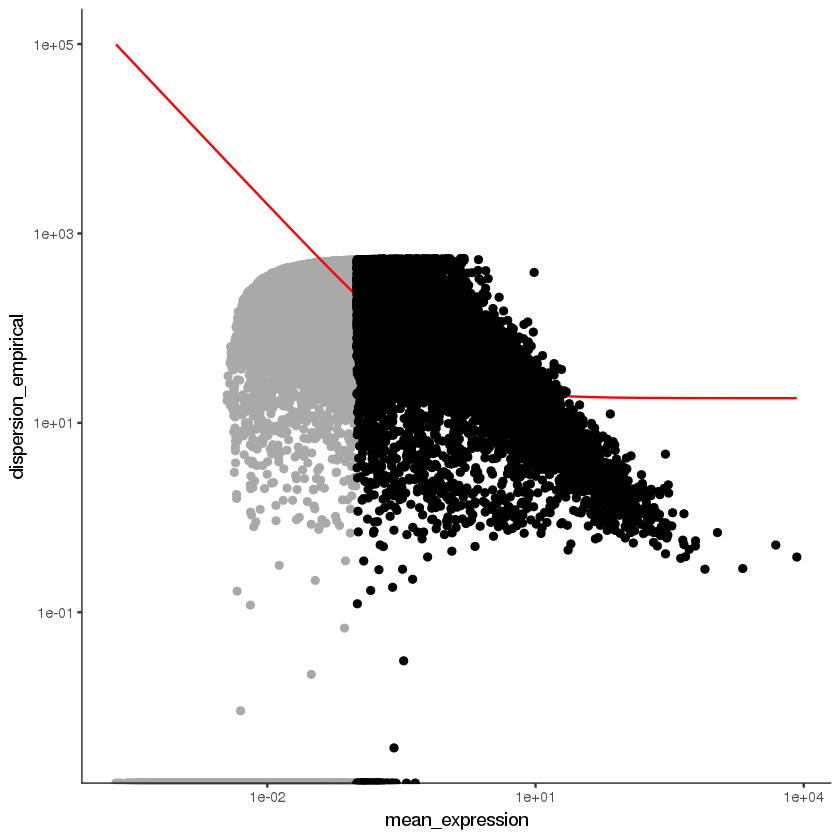

In [18]:
disp_table <- dispersionTable(HSMM)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
HSMM <- setOrderingFilter(HSMM, unsup_clustering_genes$gene_id)
plot_ordering_genes(HSMM)

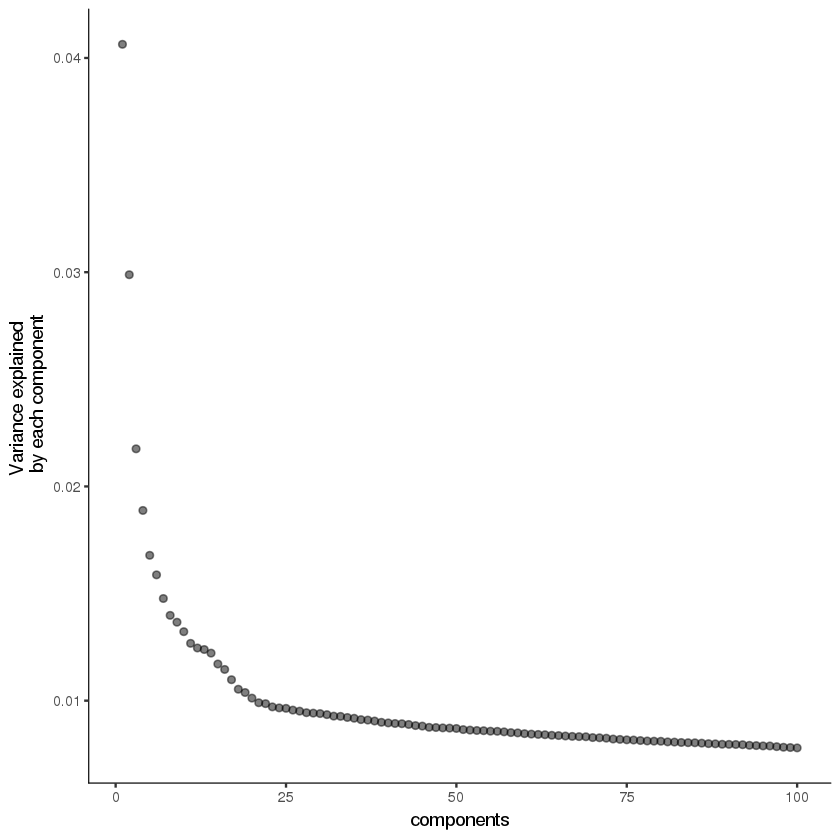

In [19]:
# HSMM@auxClusteringData[["tSNE"]]$variance_explained <- NULL
plot_pc_variance_explained(HSMM, return_all = F) # norm_method='log'

In [20]:
HSMM <- reduceDimension(HSMM,
                        max_components = 2,
                        norm_method = 'log',
                        num_dim = 25,
                        reduction_method = 'tSNE',
                        verbose = T)

Remove noise by PCA ...
Reduce dimension by tSNE ...


In [21]:
HSMM <- clusterCells(HSMM, verbose = F)

Distance cutoff calculated to 1.81085 


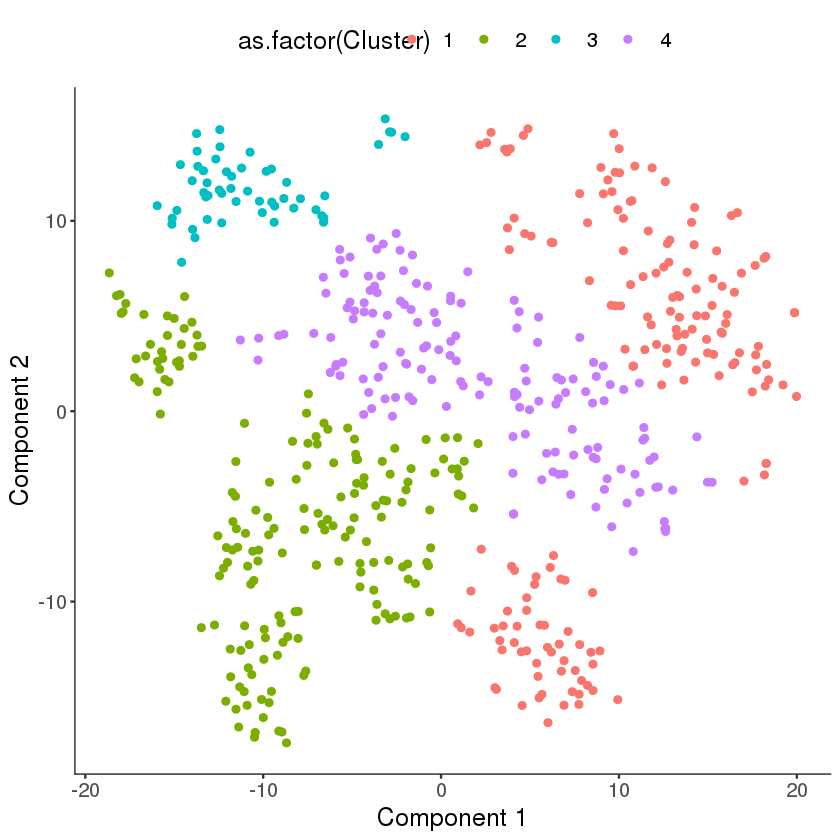

In [22]:
set.seed(100)
plot_cell_clusters(HSMM, color_by = 'as.factor(Cluster)')

In [23]:
HSMM_expressed_genes <-  row.names(subset(fData(HSMM),
num_cells_expressed >= 10))

In [24]:
clustering_DEG_genes <-
    differentialGeneTest(HSMM[HSMM_expressed_genes,],
          fullModelFormulaStr = '~Cluster',
          cores = 1)

In [25]:
HSMM_ordering_genes <-
    row.names(clustering_DEG_genes)[order(clustering_DEG_genes$qval)][1:1000]

In [26]:
HSMM <-
    setOrderingFilter(HSMM,
        ordering_genes = HSMM_ordering_genes)

In [27]:
HSMM <- reduceDimension(HSMM, method = 'DDRTree')

In [28]:
HSMM <- orderCells(HSMM)

In [29]:
all_projectory <- plot_cell_trajectory(HSMM, color_by = "Cluster")

In [26]:
pdf("./Broad_presentation_figures/Monocle_trajectory_unbiased_cluster.pdf",width=5,height=5)
all_projectory
dev.off()

X11cairo 
       2

In [58]:
states <- plot_cell_trajectory(HSMM, color_by = "State") +
    facet_wrap(~State, nrow = 1)

In [59]:
pdf("./Broad_presentation_figures/Monocle_trajectory_unbiased_states.pdf",width=7.8,height=5)
states
dev.off()

X11cairo 
       2

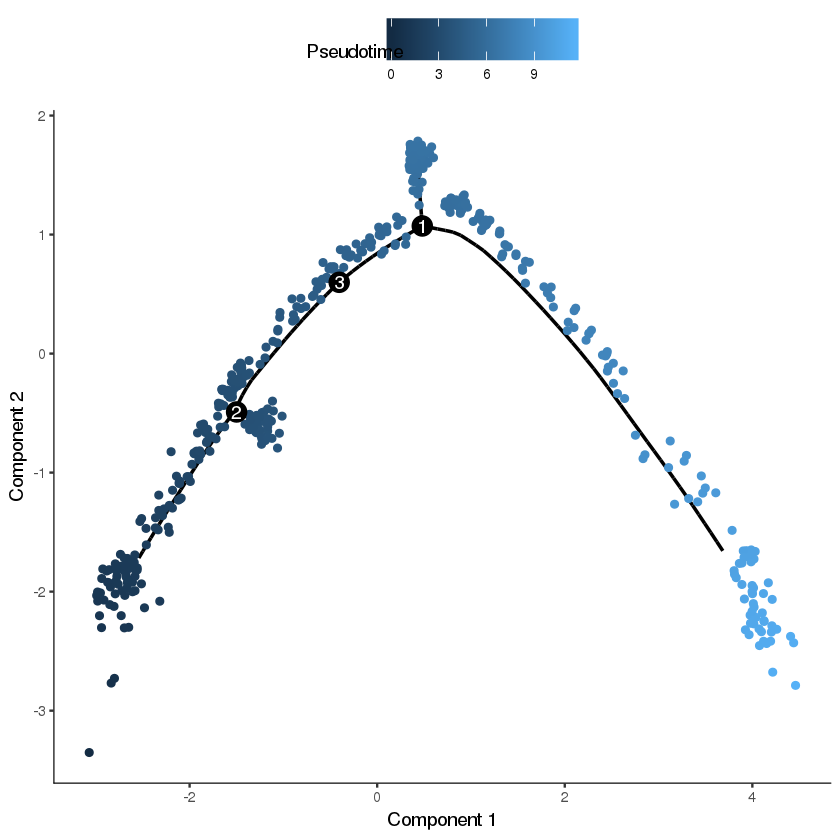

In [34]:
plot_cell_trajectory(HSMM, color_by = "Pseudotime", reverse=TRUE)

In [30]:
HSMM <- orderCells(HSMM, reverse = TRUE)

In [31]:
pst_trajectory <- plot_cell_trajectory(HSMM, color_by = "Pseudotime")

In [94]:
states <- plot_cell_trajectory(HSMM, color_by = "State") +
    facet_wrap(~State, nrow = 1) + scale_color_manual(breaks = c("1", "2","3","4","5","6","7"), values=c("#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00","#a65628","#f781bf"))

In [95]:
pdf("./Broad_presentation_figures/Monocle_trajectory_unbiased_states.pdf",width=7.8,height=5)
states
dev.off()

X11cairo 
       2

In [33]:
state_colored_single <- plot_cell_trajectory(HSMM, color_by = "State") + scale_color_manual(breaks = c("1", "2","3","4","5","6","7"), values=c("#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00","#a65628","#f781bf"))

In [34]:
pdf("./Broad_presentation_figures/Monocle_trajectory_unbiased_state_colored.pdf",width=5,height=5)
state_colored_single
dev.off()

X11cairo 
       2

In [38]:
pdf("./Broad_presentation_figures/Monocle_trajectory_unbiased_PST.pdf",width=5,height=5)
pst_trajectory
dev.off()

X11cairo 
       2

In [96]:
library(tibble)
plot_cell_trajectory2 <- function (cds, x = 1, y = 2, color_by = "State", show_tree = TRUE, 
    show_backbone = TRUE, backbone_color = "black", markers = NULL, 
    use_color_gradient = FALSE, markers_linear = FALSE, show_cell_names = FALSE, 
    show_state_number = FALSE, cell_size = 1.5, cell_link_size = 0.75, 
    cell_name_size = 2, state_number_size = 2.9, show_branch_points = TRUE, 
    theta = 0, ...)
{
    requireNamespace("igraph")
    gene_short_name <- NA
    sample_name <- NA
    sample_state <- pData(cds)$State
    data_dim_1 <- NA
    data_dim_2 <- NA
    lib_info_with_pseudo <- pData(cds)
    if (is.null(cds@dim_reduce_type)) {
        stop("Error: dimensionality not yet reduced. Please call reduceDimension() before calling this function.")
    }
    if (cds@dim_reduce_type == "ICA") {
        reduced_dim_coords <- reducedDimS(cds)
    }
    else if (cds@dim_reduce_type %in% c("simplePPT", "DDRTree")) {
        reduced_dim_coords <- reducedDimK(cds)
    }
    else {
        stop("Error: unrecognized dimensionality reduction method.")
    }
    ica_space_df <- Matrix::t(reduced_dim_coords) %>% as.data.frame() %>% 
        select_(prin_graph_dim_1 = x, prin_graph_dim_2 = y) %>% 
        mutate(sample_name = rownames(.), sample_state = rownames(.))
    dp_mst <- minSpanningTree(cds)
    if (is.null(dp_mst)) {
        stop("You must first call orderCells() before using this function")
    }
    edge_df <- dp_mst %>% igraph::as_data_frame() %>% select_(source = "from", 
        target = "to") %>% left_join(ica_space_df %>% select_(source = "sample_name", 
        source_prin_graph_dim_1 = "prin_graph_dim_1", source_prin_graph_dim_2 = "prin_graph_dim_2"), 
        by = "source") %>% left_join(ica_space_df %>% select_(target = "sample_name", 
        target_prin_graph_dim_1 = "prin_graph_dim_1", target_prin_graph_dim_2 = "prin_graph_dim_2"), 
        by = "target")
    data_df <- t(monocle::reducedDimS(cds)) %>% as.data.frame() %>% 
        select_(data_dim_1 = x, data_dim_2 = y) %>% rownames_to_column("sample_name") %>% 
        mutate(sample_state) %>% left_join(lib_info_with_pseudo %>% 
        rownames_to_column("sample_name"), by = "sample_name")
    return_rotation_mat <- function(theta) {
        theta <- theta/180 * pi
        matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), 
            nrow = 2)
    }
    rot_mat <- return_rotation_mat(theta)
    cn1 <- c("data_dim_1", "data_dim_2")
    cn2 <- c("source_prin_graph_dim_1", "source_prin_graph_dim_2")
    cn3 <- c("target_prin_graph_dim_1", "target_prin_graph_dim_2")
    data_df[, cn1] <- as.matrix(data_df[, cn1]) %*% t(rot_mat)
    edge_df[, cn2] <- as.matrix(edge_df[, cn2]) %*% t(rot_mat)
    edge_df[, cn3] <- as.matrix(edge_df[, cn3]) %*% t(rot_mat)
    markers_exprs <- NULL
    if (is.null(markers) == FALSE) {
        markers_fData <- subset(fData(cds), gene_short_name %in% 
            markers)
        if (nrow(markers_fData) >= 1) {
            markers_exprs <- reshape2::melt(as.matrix(exprs(cds[row.names(markers_fData), 
                ])))
            colnames(markers_exprs)[1:2] <- c("feature_id", "cell_id")
            markers_exprs <- merge(markers_exprs, markers_fData, 
                by.x = "feature_id", by.y = "row.names")
            markers_exprs$feature_label <- as.character(markers_exprs$gene_short_name)
            markers_exprs$feature_label[is.na(markers_exprs$feature_label)] <- markers_exprs$Var1
        }
    }
    if (is.null(markers_exprs) == FALSE && nrow(markers_exprs) > 
        0) {
        data_df <- merge(data_df, markers_exprs, by.x = "sample_name", 
            by.y = "cell_id")
        if (use_color_gradient) {
            if (markers_linear) {
                g <- ggplot(data = data_df, aes(x = data_dim_1, 
                  y = data_dim_2)) + geom_point(aes(color = value), 
                  size = I(cell_size), na.rm = TRUE) + scale_color_viridis(name = paste0("value"), 
                  ...) + facet_wrap(~feature_label)
            }
            else {
                g <- ggplot(data = data_df, aes(x = data_dim_1, 
                  y = data_dim_2)) + geom_point(aes(color = log10(value + 
                  0.1)), size = I(cell_size), na.rm = TRUE) + 
                  scale_color_viridis(name = paste0("log10(value + 0.1)"), 
                    ...) + facet_wrap(~feature_label)
            }
        }
        else {
            if (markers_linear) {
                g <- ggplot(data = data_df, aes(x = data_dim_1, 
                  y = data_dim_2, size = (value * 0.1))) + facet_wrap(~feature_label)
            }
            else {
                g <- ggplot(data = data_df, aes(x = data_dim_1, 
                  y = data_dim_2, size = log10(value + 0.1))) + 
                  facet_wrap(~feature_label)
            }
        }
    }
    else {
        g <- ggplot(data = data_df, aes(x = data_dim_1, y = data_dim_2))
    }
    if (show_tree) {
        g <- g + geom_segment(aes_string(x = "source_prin_graph_dim_1", 
            y = "source_prin_graph_dim_2", xend = "target_prin_graph_dim_1", 
            yend = "target_prin_graph_dim_2"), size = cell_link_size, 
            linetype = "solid", na.rm = TRUE, data = edge_df)
    }
    if (is.null(markers_exprs) == FALSE && nrow(markers_exprs) > 
        0) {
        if (use_color_gradient) {
        }
        else {
            g <- g + geom_point(aes_string(color = color_by), 
                na.rm = TRUE)
        }
    }
    else {
        if (use_color_gradient) {
        }
        else {
            g <- g + geom_point(aes_string(color = color_by), 
                size = I(cell_size), na.rm = TRUE)
        }
    }
    if (show_branch_points && cds@dim_reduce_type == "DDRTree") {
        mst_branch_nodes <- cds@auxOrderingData[[cds@dim_reduce_type]]$branch_points
        branch_point_df <- ica_space_df %>% slice(match(mst_branch_nodes, 
            sample_name)) %>% mutate(branch_point_idx = seq_len(n()))
        g <- g + geom_point(aes_string(x = "prin_graph_dim_1", 
            y = "prin_graph_dim_2"), size = 5, na.rm = TRUE, 
            branch_point_df) + geom_text(aes_string(x = "prin_graph_dim_1", 
            y = "prin_graph_dim_2", label = "branch_point_idx"), 
            size = 4, color = "white", na.rm = TRUE, branch_point_df)
    }
    if (show_cell_names) {
        g <- g + geom_text(aes(label = sample_name), size = cell_name_size)
    }
    if (show_state_number) {
        g <- g + geom_text(aes(label = sample_state), size = state_number_size)
    }
    g <- g + xlab(paste("Component", x)) + 
        ylab(paste("Component", y)) + theme(legend.position = "top", 
        legend.key.height = grid::unit(0.35, "in")) + theme(legend.key = element_blank()) + 
        theme(panel.background = element_rect(fill = "white"))
    
    return(data_df)
}

In [97]:
trajectory_coordinates <- plot_cell_trajectory2(HSMM)

In [98]:
monocle_trajectory <- HSMM@reducedDimS
colnames(monocle_trajectory) <- rownames(reducedDim(onlyCD8_cells,"pagoda_tSNE"))
monocle_trajectory <- t(monocle_trajectory)
head(monocle_trajectory)

X170328_NB501311_0063_AHHHJ3BGX2_DEANTA3.1_TALL_040716_plate7_E3_rep_1_NA,0.4823749,1.648782827
X181005_NB501311_0312_AH2WG2BGX9_DEANTA0_CD8_Tcell_092418_plate1_B1_S290_rep1_NA,0.4850553,1.713684701
X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor5_080818_plate1_E6_S141_rep1_NA,2.4386125,-0.005683198
X181012_NB501311_0316_AH57JJBGX9_DEANTA2_CD8_Tcell_092818_plate1_H3_S24_rep1_NA,0.7949396,1.270842183
X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor5_080818_plate1_C5_S131_rep1_NA,3.9861122,-1.749632219
X170928_NB501311_0130_AHGKYLBGX3_DEANTA3_TALL_091817_plate1_F7_rep_1_NA,0.3993461,1.592690918


In [99]:
old_data <- onlyCD8_cells
reducedDimNames(old_data)

[1] "allPCApd"        "oldtSNE"         "pagoda_largeVIS" "pagoda_tSNE"    
[5] "monocle_traj"

In [100]:
old_data <- onlyCD8_cells
reducedDimNames(old_data)

[1] "allPCApd"        "oldtSNE"         "pagoda_largeVIS" "pagoda_tSNE"    
[5] "monocle_traj"

In [101]:
reducedDims(onlyCD8_cells) <- SimpleList(allPCApd=reducedDims(old_data)$allPCApd, oldtSNE=reducedDims(old_data)$oldtSNE,pagoda_largeVIS=reducedDims(old_data)$pagoda_largeVIS,pagoda_tSNE=reducedDims(old_data)$pagoda_tSNE,monocle_traj=monocle_trajectory)

In [102]:
colData(onlyCD8_cells)$monocle_state <- trajectory_coordinates$State
colData(onlyCD8_cells)$monocle_pseudotime <- trajectory_coordinates$Pseudotime
colData(onlyCD8_cells)$monocle_type <- trajectory_coordinates$CellType

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

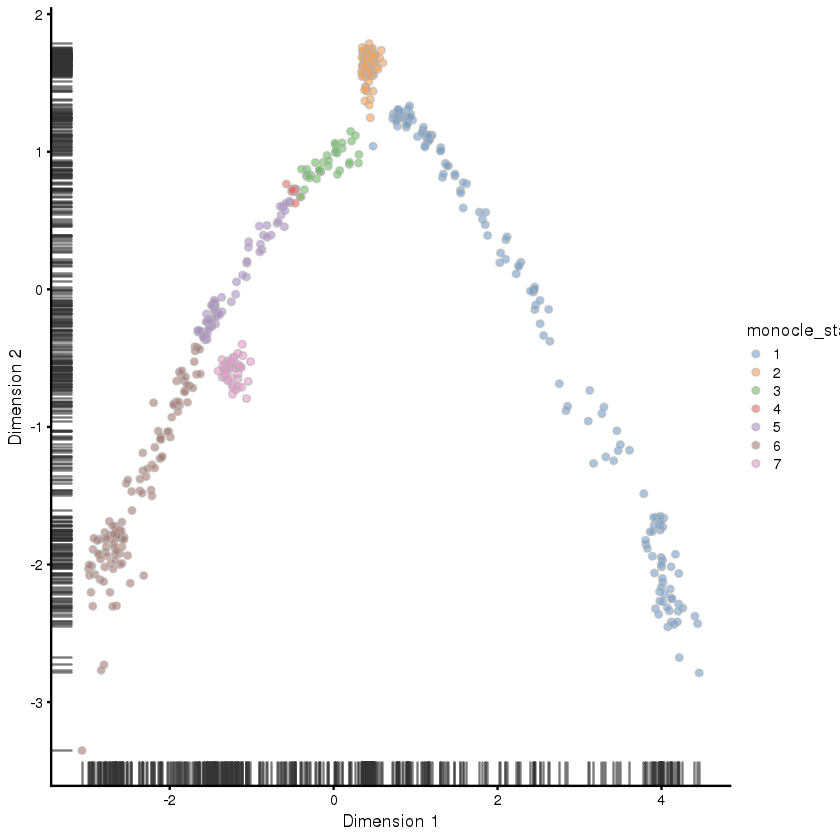

In [103]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "monocle_state")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

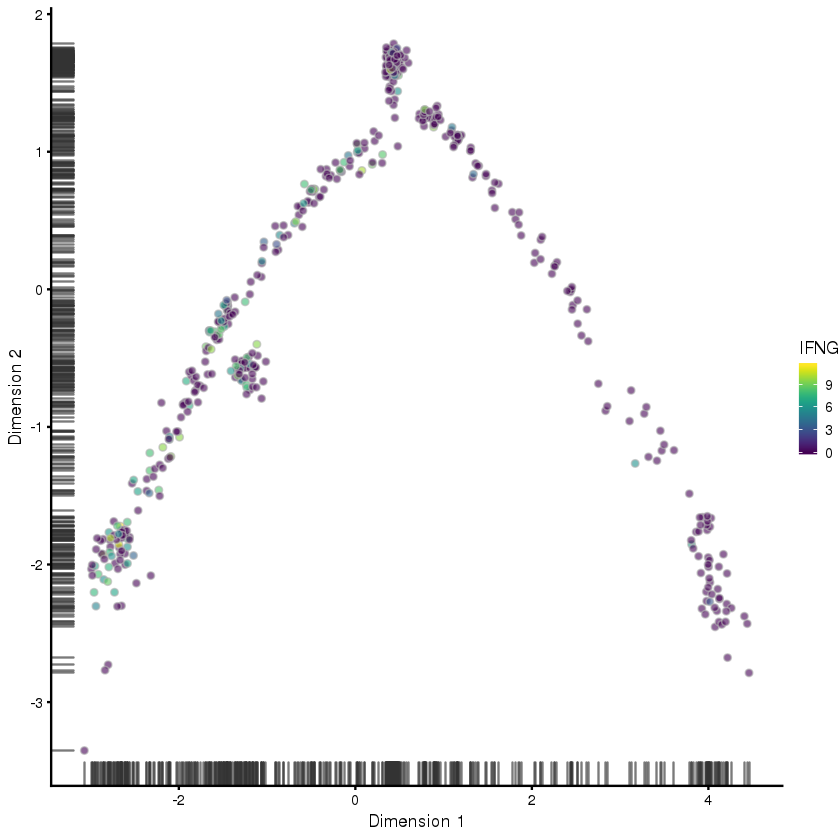

In [47]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "IFNG")

In [48]:
cd8_naive <- c("CD8A","CD8B","POU6F1","LMO4","CCR7","IL7R","SELL")
cd8_cytotoxic <- c("CD8A","CD8B","EOMES","TBX21","PRDM1","IFNG","PRF1","GZMA","GZMB","NKG7","CST7","CCL3","CCL4")
cd8_exhaustion <- c("CD8A","CD8B","PDCD1","HAVCR2","SPN","LAG3","TIGIT","PRDM1")

In [49]:
get_combined_score <- function(rds,genelist){
    required_rds <- rds[which(rownames(rds) %in% genelist),]
    return(colMeans(assay(required_rds,"scaledval")))
}

In [50]:
cd8_naive_score <- get_combined_score(onlyCD8_cells,cd8_naive)
cd8_exhaustion_score <- get_combined_score(onlyCD8_cells,cd8_exhaustion)
cd8_cytotoxic_score <- get_combined_score(onlyCD8_cells,cd8_cytotoxic)

In [104]:
norm_exhaustion_score <- cd8_exhaustion_score - cd8_naive_score 
norm_cytotoxic_score <- cd8_cytotoxic_score - cd8_naive_score

norm_exhaustion_score <- cd8_exhaustion_score - cd8_naive_score 
norm_exhaustion_score[norm_exhaustion_score > 2.0] = 2.0
norm_exhaustion_score[norm_exhaustion_score < 0 ] = 0
colData(onlyCD8_cells)$norm_exhaustion_score <- norm_exhaustion_score

norm_cytotoxic_score <- cd8_cytotoxic_score - cd8_naive_score
norm_cytotoxic_score[norm_cytotoxic_score > 2.0] = 2.0
norm_cytotoxic_score[norm_cytotoxic_score < 0] = 0
colData(onlyCD8_cells)$norm_cytotoxic_score <- norm_cytotoxic_score

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

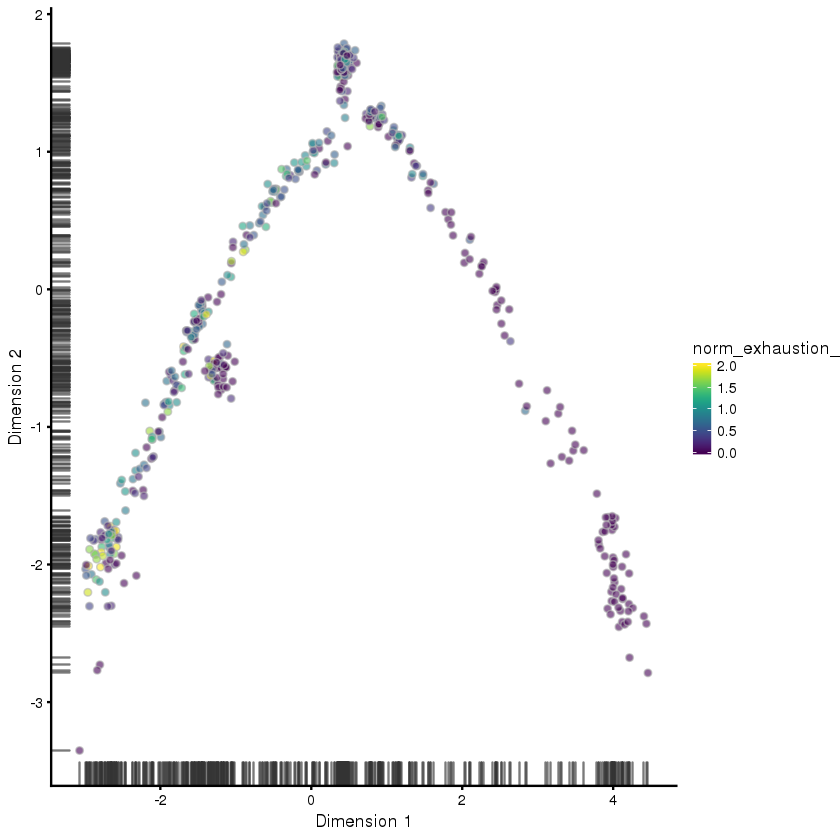

In [52]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "norm_exhaustion_score")

In [105]:
saveRDS(onlyCD8_cells,"./Exhaustion_onlyCD8cell_nohighcyc2.rds")

In [2]:
onlyCD8_cells <- readRDS("Exhaustion_onlyCD8cell_nohighcyc2.rds")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

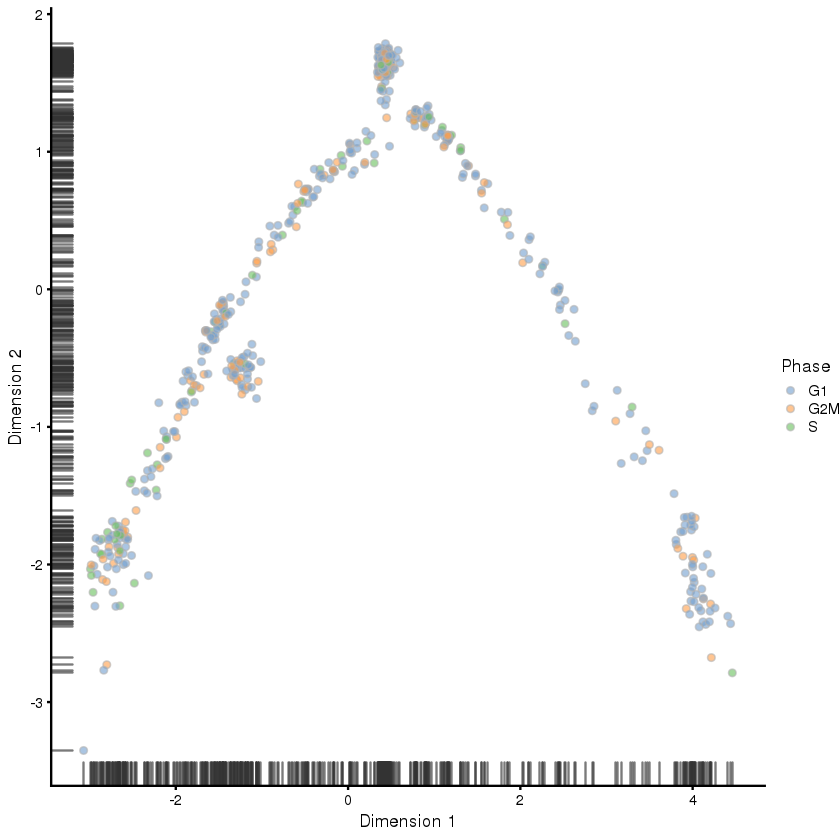

In [3]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "Phase")

In [11]:
colData(onlyCD8_cells)$monocle_state <- proper_clusters

In [ ]:
saveRDS(onlyCD8_cells,"./Exhaustion_onlyCD8cell_nohighcyc2.rds")

In [ ]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "ENTPD1")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

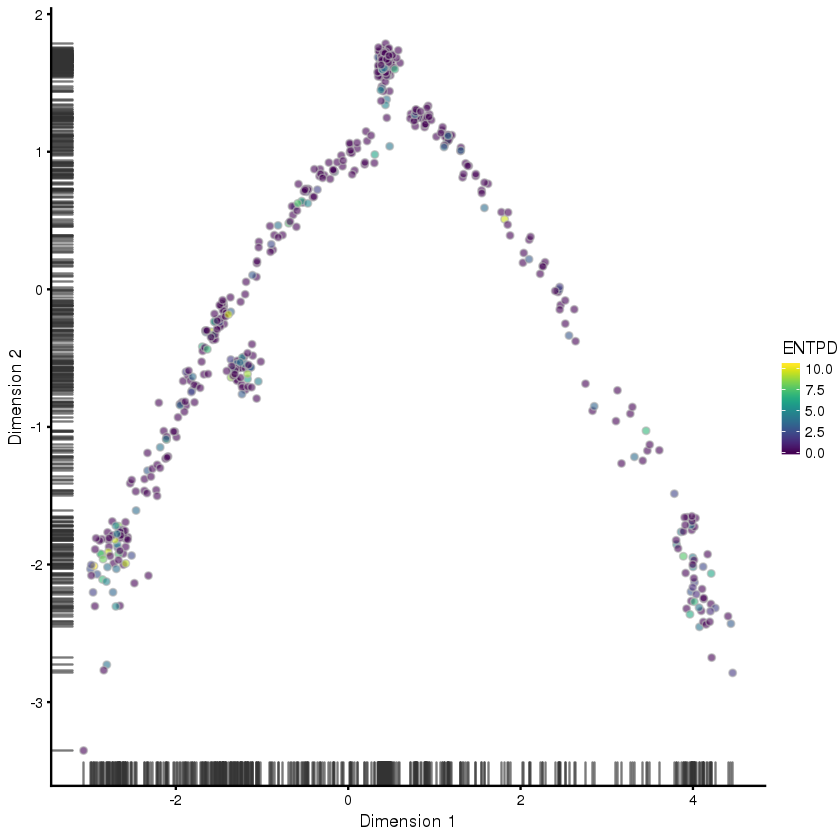

In [3]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "ENTPD1")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

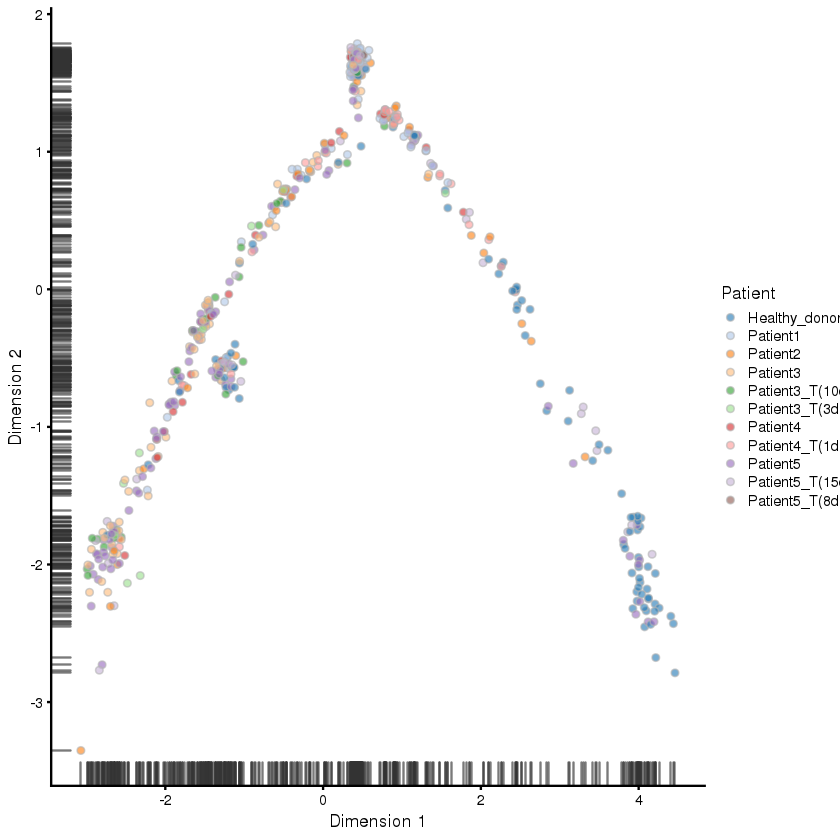

In [3]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "Patient")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

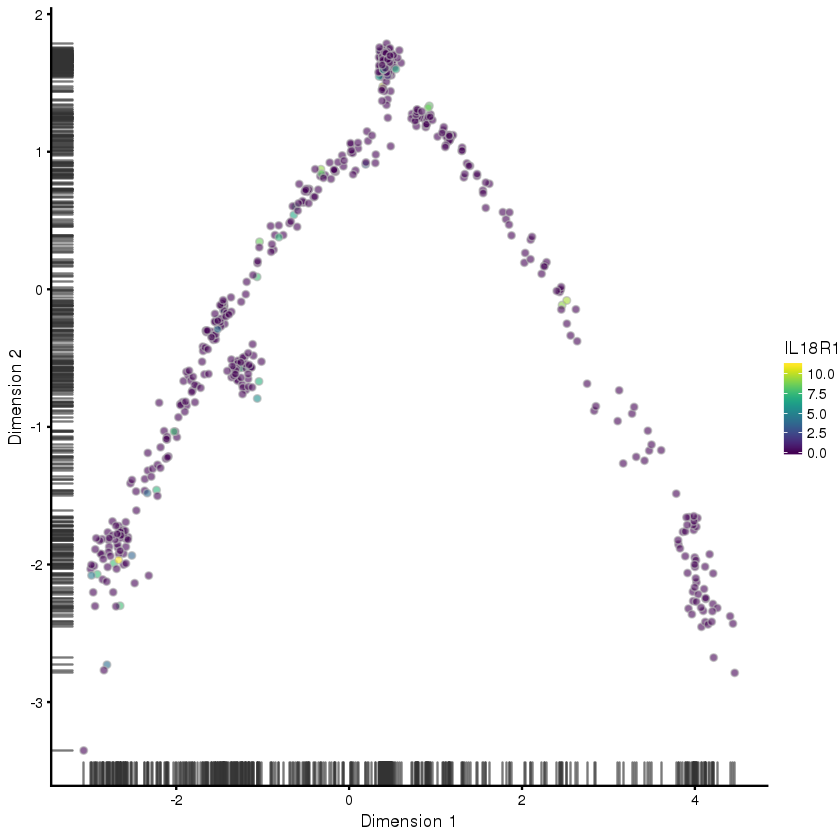

In [6]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "IL18R1")

In [6]:
monocle_state_markers <- findMarkers(assay(onlyCD8_cells,"logcounts"),onlyCD8_cells$monocle_state, pval.type=c("any","all"),direction=c("any"),subset.row=NULL)

In [55]:
table(onlyCD8_cells$monocle_state)


  1   2   3   4   5   6   7 
155 121  34  11  70 115  42 

In [3]:
table(onlyCD8_cells$treatment)


  Treated Untreated 
      125       423 

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

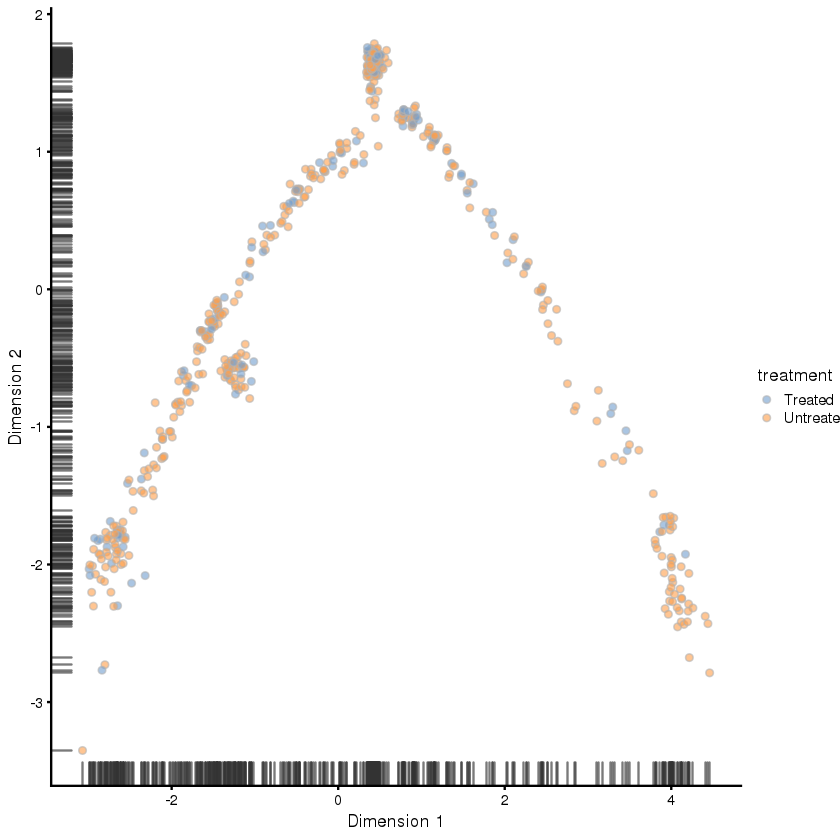

In [4]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "treatment")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

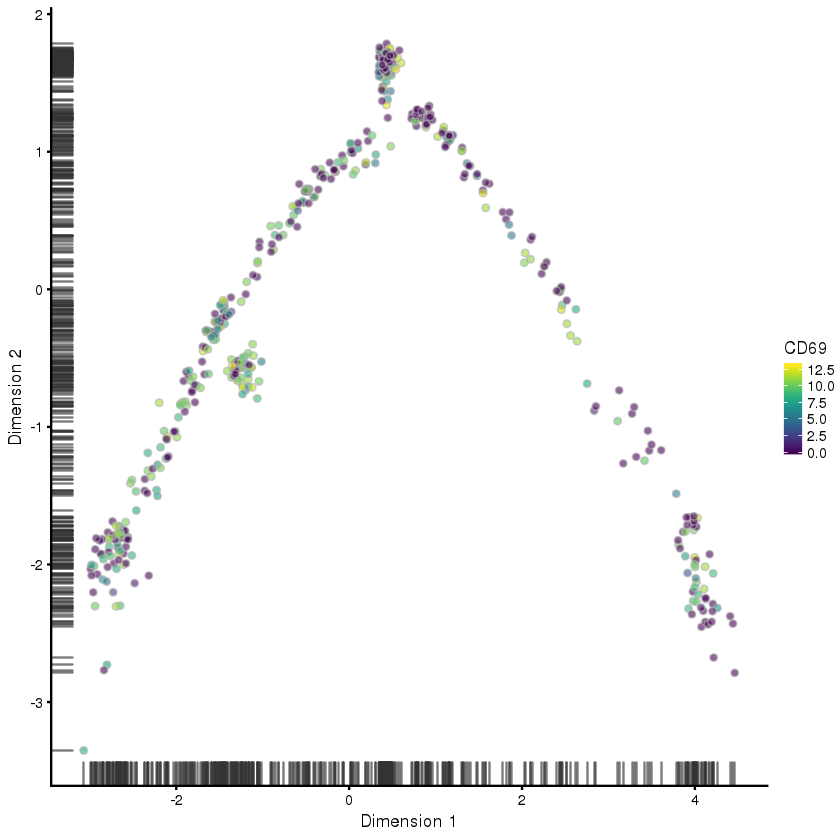

In [13]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "CD69")

In [84]:
patient <- rep("HD(s)",length(colnames(onlyCD8_cells)))
patient[grepl("DEANTA",onlyCD8_cells$individual)] = "T-ALL"
table(patient)

patient
HD(s) T-ALL 
  102   446 

In [88]:
color_factor <- function(rdsfile,factor_vector,title){
    df <- as.data.frame(reducedDims(rdsfile)$monocle_traj)
    colnames(df) <- c("Component1","Component2")
    df$Component1 <- as.numeric(as.character(df$Component1))
    df$Component2 <- as.numeric(as.character(df$Component2))
    rownames(df) <- c()
    tSNEplot <- ggplot(df, aes(x=df$Component1, df$Component2)) + geom_point(aes(colour = factor_vector),alpha = 0.75,size=0.5) + 
    ylab("Component2") + xlab("Component1") + 
    theme_update(plot.title = element_text(hjust = 0.5)) + 
    ggtitle(title) + theme(legend.title=element_blank()) + theme(axis.line=element_blank(),axis.text.x=element_blank(),
          axis.text.y=element_blank(),axis.ticks=element_blank(),
          panel.background=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank(), panel.border = element_rect(colour = "gray", fill=NA, size=1)) + scale_color_manual(breaks = c("HD(s)", "T-ALL"), values=c("#1b9e77", "#d95f02")) + theme(legend.position = "top")
    return(tSNEplot)
}

In [89]:
normal_colored <- color_factor(onlyCD8_cells,patient,"")

In [91]:
pdf("./Broad_presentation_figures/Trajectory_colored.pdf",height=3.5,width=3)
normal_colored
dev.off()

X11cairo 
       2

In [3]:
suppressPackageStartupMessages(library("ComplexHeatmap"))

In [4]:
library(circlize)
col_fun = colorRamp2(c(-2, 0, 2), c("blue", "white", "red"))
col_fun(seq(-1, 2))

circlize version 0.4.5
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.



[1] "#B38BFFFF" "#FFFFFFFF" "#FF9E81FF" "#FF0000FF"

In [5]:
assays(onlyCD8_cells)

List of length 4
names(4): counts logcounts logcounts_raw scaledval

In [11]:
all_values <- assay(onlyCD8_cells,"scaledval")

In [12]:
ordered_values <- all_values[,order(onlyCD8_cells$monocle_pseudotime)]

In [14]:
head(ordered_values)

,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor4_080818_plate1_E1_S5_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor5_080818_plate1_A2_S105_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor4_080818_plate1_C6_S43_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor4_080818_plate1_H2_S16_rep1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092818_plate1_B2_S106_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor5_080818_plate1_H10_S176_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor5_080818_plate1_F2_S110_rep1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092818_plate1_B12_S186_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor4_080818_plate1_F3_S22_rep1_NA,X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor4_080818_plate1_F12_S94_rep1_NA,⋯,X180303_NB501311_0200_AHJJV3BGX5_DEANTA4_TBMG_020618_plate1_H10_rep_1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA2.10_CD8_Tcell_092818_plate1_C8_S251_rep1_NA,X180120_NB501311_0183_AH3GG3BGX5_DEANTA4.15_TALL_010818_plate1_B8_rep_1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA2.10_CD8_Tcell_092818_plate1_B4_S218_rep1_NA,X170104_NB501311_0047_AHY73GBGXY_DEANTA1_TALL_041913_plate8_G3_rep_1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA2_CD8_Tcell_092818_plate1_A4_S25_rep1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092818_plate1_H1_S104_rep1_NA,X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092418_plate1_F5_S230_rep1_NA,X180521_NB501311_0242_AHH3LVBGX5_DEANTA4.15RS1_TALL_031418_plate1_G9_rep_1_NA,X161028_NB501311_0038_AH273LBGX2_DEANTA1_TALL_041913_plate4_A8_rep_1_NA
TSPAN6,21.67595448,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390,4.22574637,-0.05322390,-0.05322390,-0.05322390,⋯,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390,-0.05322390
TNMD,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,⋯,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533,-0.01675533
DPM1,-0.46428519,-0.46428519,-0.46428519,2.87016672,-0.46428519,1.31069286,-0.46428519,-0.46428519,-0.46428519,0.96397932,⋯,-0.46428519,-0.46428519,-0.46428519,2.64691134,-0.46428519,2.58453157,-0.46428519,-0.46428519,-0.46428519,-0.46428519
SCYL3,-0.35953662,3.93618611,0.43448494,-0.35953662,1.96306468,-0.35953662,-0.35953662,-0.35953662,-0.35953662,-0.35953662,⋯,-0.35953662,-0.35953662,-0.35953662,-0.35953662,-0.35953662,-0.35953662,2.50843393,-0.35953662,-0.35953662,-0.35953662
C1orf112,-0.05405689,-0.29292197,1.07586724,-0.29292197,-0.29292197,2.28223444,-0.29292197,-0.29292197,-0.29292197,-0.29292197,⋯,-0.29292197,-0.29292197,-0.29292197,-0.29292197,-0.29292197,-0.29292197,-0.29292197,-0.29292197,-0.29292197,-0.29292197
FGR,-0.54347046,-0.54347046,-0.54347046,-0.54347046,-0.54347046,-0.54347046,-0.54347046,-0.54347046,-0.54347046,-0.54347046,⋯,0.73591374,1.47089840,1.71640585,-0.54347046,-0.54347046,1.65434387,-0.54347046,-0.54347046,-0.54347046,-0.54347046


In [31]:
required_genes <- c("POU6F1","LMO4","CCR7","IL7R","SELL","EOMES","TBX21","PRDM1","IFNG","PRF1","GZMA","GZMB","NKG7","CST7","PDCD1","HAVCR2","LAG3","TIGIT")

In [18]:
dim(ordered_values)

[1] 53916   548

In [32]:
required_values <- ordered_values[required_genes,]
dim(required_values)

[1]  18 548

In [33]:
split <- factor(c(rep("Naive",5),rep("Cytotoxic",9),rep("Exhaustion",4)), levels=c("Naive","Cytotoxic","Exhaustion"))

In [34]:
length(split)

[1] 18

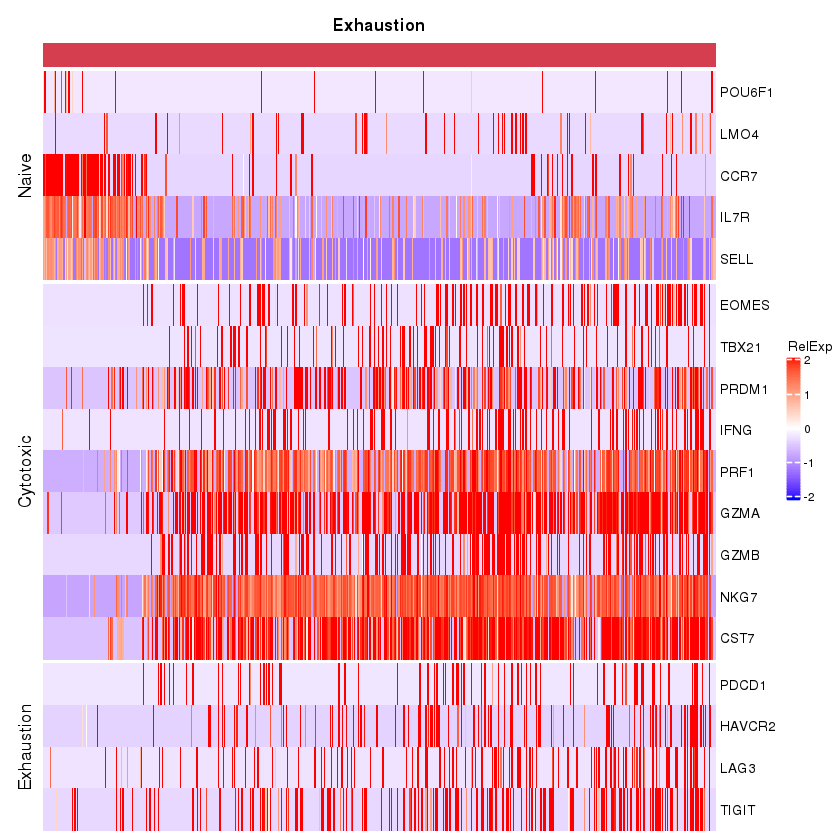

In [35]:
df_c1 = data.frame(type = c(rep("Exhaustion", 548)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("Exhaustion" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
cluster1_heatmap <- Heatmap(required_values, split = split, name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "Exhaustion", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))
cluster1_heatmap

In [4]:
color_states <- function(rdsfile,factor_vector,title){
    df <- as.data.frame(reducedDims(rdsfile)$monocle_traj)
    colnames(df) <- c("Component1","Component2")
    df$Component1 <- as.numeric(as.character(df$Component1))
    df$Component2 <- as.numeric(as.character(df$Component2))
    rownames(df) <- c()
    tSNEplot <- ggplot(df, aes(x=df$Component1, df$Component2)) + geom_point(aes(colour = factor_vector),alpha = 0.75,size=0.5) + 
    ylab("Component2") + xlab("Component1") + 
    theme_update(plot.title = element_text(hjust = 0.5)) + 
    ggtitle(title) + theme(legend.title=element_blank()) + theme(axis.line=element_blank(),axis.text.x=element_blank(),
          axis.text.y=element_blank(),axis.ticks=element_blank(),
          panel.background=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank(), panel.border = element_rect(colour = "gray", fill=NA, size=1)) + scale_color_manual(breaks = c("1","2","3","4","5","6","7"), values=c("#e41a1c", "#377eb8", "#4daf4a","#984ea3","#ff7f00","#a65628","#f781bf")) + theme(legend.position = "top")
    return(tSNEplot)
}

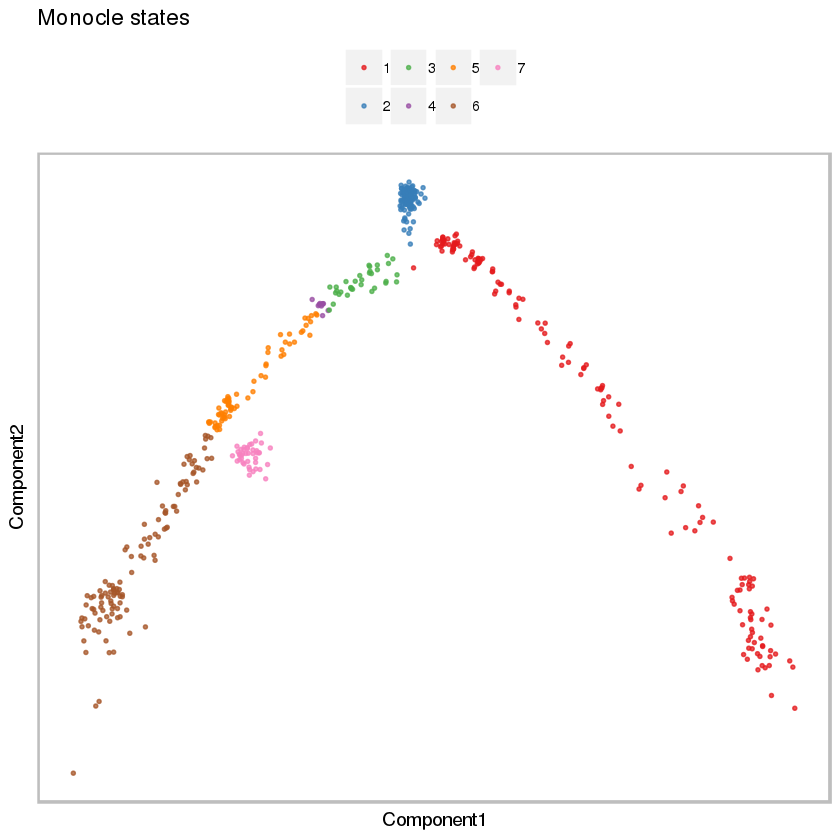

In [5]:
color_states(onlyCD8_cells,onlyCD8_cells$monocle_state,"Monocle states")

In [37]:
pdf("./Broad_presentation_figures/CD8_only_pseudotime_marker_heatmap.pdf",width=7.4,height=3)
cluster1_heatmap
dev.off()

X11cairo 
       2

### Getting the GSEA plots

In [36]:
library("liger")

In [37]:
state6_rank <- read.csv("/home/pa124/mydata/BioConductor_simpleSingleCell/New_with2patient_norm/Monocle_final_unbiased_cluster_markers/State6_ranklist.txt", sep=",", head=T)
head(state6_rank)

Genes,log2FC
APOBEC3G,2.74054
PTPN7,2.43715
DZIP3,2.34045
GZMK,2.15876
PLCG2,2.11842
SLAMF7,2.11563


In [39]:
fc <- state6_rank$log2FC
names(fc) <- state6_rank$Genes
head(fc)

APOBEC3G    PTPN7    DZIP3     GZMK    PLCG2   SLAMF7 
 2.74054  2.43715  2.34045  2.15876  2.11842  2.11563

In [41]:
gene_set <- read.csv("/home/pa124/mydata/BioConductor_simpleSingleCell/New_with2patient_norm/Monocle_final_unbiased_cluster_markers/GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_DN.txt", head=T)
head(gene_set)

gsets <- list(PD1LOW_Vs_CD8NAIVE=gene_set$Genes)

Genes
ABCA2
ACOT9
ACTN4
ADAM8
ADRB2
AHNAK


[1] 2e-04

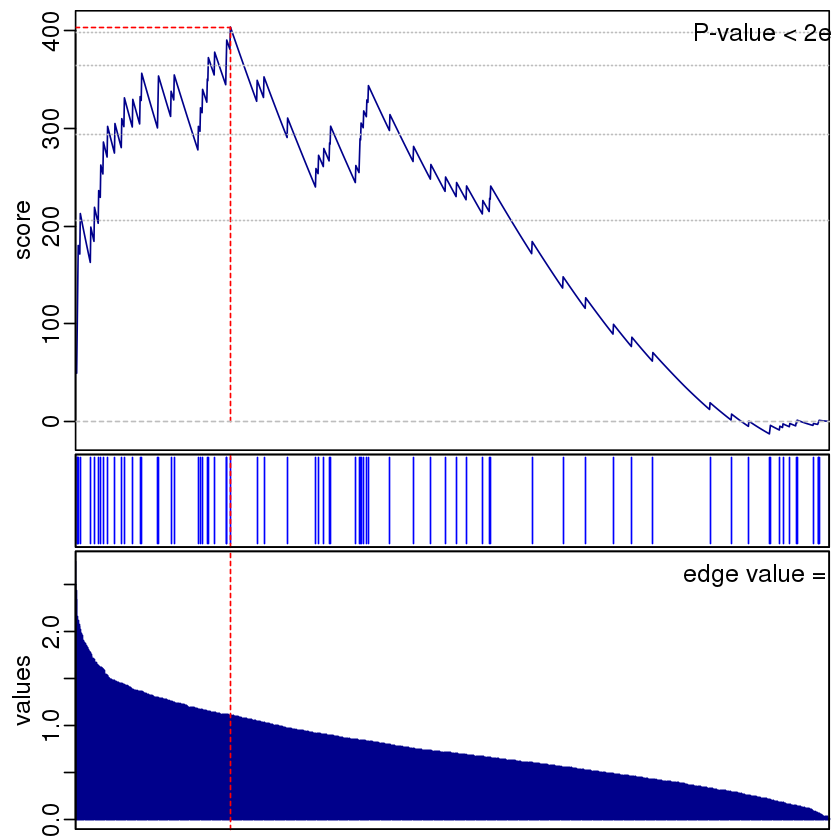

In [42]:
gsea(values=fc,geneset = gsets$PD1LOW_Vs_CD8NAIVE)

In [51]:
monocle_state_markers <- findMarkers(assay(onlyCD8_cells,"logcounts"),onlyCD8_cells$monocle_state, pval.type=c("any","all"),direction=c("down"),subset.row=NULL)

In [49]:
length(onlyCD8_cells$monocle_state)

[1] 548

In [ ]:
write.csv(monocle_state_markers$`1`[which(monocle_state_markers$`1`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State1_down.csv")
write.csv(monocle_state_markers$`2`[which(monocle_state_markers$`2`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State2_d.csv")
write.csv(monocle_state_markers$`3`[which(monocle_state_markers$`3`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State3_all.csv")
write.csv(monocle_state_markers$`4`[which(monocle_state_markers$`4`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State4_all.csv")
write.csv(monocle_state_markers$`5`[which(monocle_state_markers$`5`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State5_all.csv")
write.csv(monocle_state_markers$`6`[which(monocle_state_markers$`6`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State6_all.csv")
write.csv(monocle_state_markers$`7`[which(monocle_state_markers$`7`$FDR < 0.01),],"./Monocle_final_unbiased_cluster_markers/State7_all.csv")

In [69]:
state1_markers <- c("CCR7","IL7R","NELL2","SELL","TCF7","LEF1","SATB1","CXCR4")
length(state1_markers)
state2_markers <- c("DUSP2","NKG7","ELK3","SIK1","TMEM39A","BRPF1","PHAX","TGFBR3")
length(state2_markers)
state3_markers <- c("PRF1")
length(state3_markers)
state4_markers <- c("GZMH","MSN","WNK1","SH3KBP1","SYNE1","PARP8","MACF1","SYNE2")
length(state4_markers)
state5_markers <- c("GIMAP4","SAMHD1","ANXA5","GBP5","PHIP","CCR5","PARP14","GZMA")
length(state5_markers)
state6_markers <- c("APOBEC3G","PTPN7","DZIP3","GZMK","PLCG2","SLAMF7","DENND2D","GIMAP4")
length(state6_markers)
state7_markers <- c("THRAP3","DPYD","TMEM39A","KLF6","LCP1")
length(state7_markers)

terminal_specific <- c("PDCD1","HAVCR2","LAG3","CD244","TNFRSF9","IFNG","IL10","FASLG","NFKB2","BATF","NFATC1","TBX21","CX3CR1","CSF1")

length(terminal_specific)

[1] 8

[1] 8

[1] 1

[1] 8

[1] 8

[1] 8

[1] 5

[1] 14

In [70]:
combined_markers <- c(state1_markers,state2_markers,state3_markers,state4_markers,state5_markers,state6_markers,state7_markers,terminal_specific)
length(combined_markers)

[1] 60

In [46]:
`%nin%` = Negate(`%in%`)

In [71]:
combined_markers[combined_markers %nin% rownames(onlyCD8_cells)]

character(0)

In [72]:
combined_cluster_logcounts_scaled <- assay(onlyCD8_cells,"scaledval")
combined_cluster_logcounts_scaled_required <- combined_cluster_logcounts_scaled[combined_markers,]
combined_cluster_logcounts_scaled_required[combined_cluster_logcounts_scaled_required < -2] = -2
combined_cluster_logcounts_scaled_required[combined_cluster_logcounts_scaled_required > 2] = 2

In [73]:
split <- factor(c(rep("1",8),rep("2",8),rep("3",1),rep("4",8),rep("5",8),rep("6",8),rep("7",5),rep("Term.Exh",14)), levels=c("1","2","3","4","5","6","7","Term.Exh"))

In [66]:
suppressPackageStartupMessages(library("ComplexHeatmap"))
library(circlize)
col_fun = colorRamp2(c(-2, 0, 2), c("blue", "white", "red"))
col_fun(seq(-1, 2))


[1] "#B38BFFFF" "#FFFFFFFF" "#FF9E81FF" "#FF0000FF"

In [74]:
state1_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "1")]
state1_cells_ordered <- state1_cells[order(state1_cells$monocle_state)]
state1_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state1_cells_ordered)]
dim(state1_ordered)
state2_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "2")]
state2_cells_ordered <- state2_cells[order(state2_cells$monocle_state)]
state2_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state2_cells_ordered)]
dim(state2_ordered)

state3_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "3")]
state3_cells_ordered <- state3_cells[order(state3_cells$monocle_state)]
state3_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state3_cells_ordered)]
dim(state3_ordered)

state4_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "4")]
state4_cells_ordered <- state4_cells[order(state4_cells$monocle_state)]
state4_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state4_cells_ordered)]
dim(state4_ordered)

state5_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "5")]
state5_cells_ordered <- state5_cells[order(state5_cells$monocle_state)]
state5_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state5_cells_ordered)]
dim(state5_ordered)

state6_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "6")]
state6_cells_ordered <- state6_cells[order(state6_cells$monocle_state)]
state6_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state6_cells_ordered)]
dim(state6_ordered)

state7_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "7")]
state7_cells_ordered <- state7_cells[order(state7_cells$monocle_state)]
state7_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state7_cells_ordered)]
dim(state7_ordered)


[1]  60 155

[1]  60 121

[1] 60 34

[1] 60 11

[1] 60 70

[1]  60 115

[1] 60 42

Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp,
Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp,
Rel.Exp, Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp,
Rel.Exp, Rel.Exp, Rel.Exp”

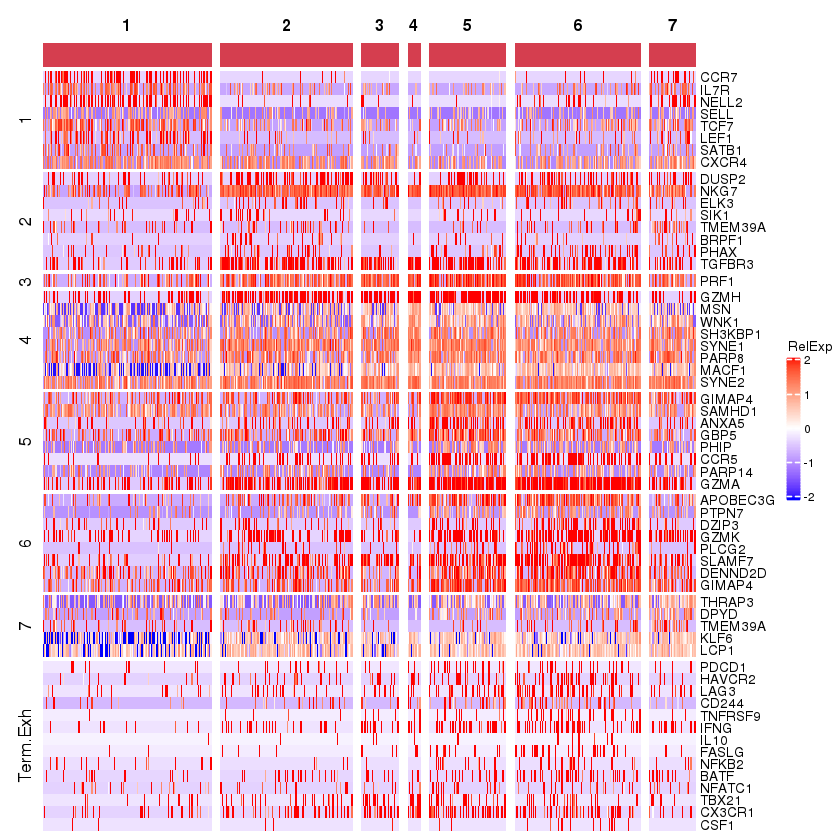

In [75]:
df_c1 = data.frame(type = c(rep("1", 155)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("1" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state1_heatmap <- Heatmap(state1_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "1", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = FALSE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))


df_c1 = data.frame(type = c(rep("2", 121)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("2" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state2_heatmap <- Heatmap(state2_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "2", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("3", 34)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("3" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state3_heatmap <- Heatmap(state3_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "3", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("4", 11)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("4" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state4_heatmap <- Heatmap(state4_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "4", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("5", 70)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("5" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state5_heatmap <- Heatmap(state5_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "5", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("6", 115)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("6" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state6_heatmap <- Heatmap(state6_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "6", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("7", 42)))
ha = HeatmapAnnotation(df = df_c1,col = list(type = c("7" =  "#D53E4F")),show_annotation_name = FALSE,show_legend=FALSE)
state7_heatmap <- Heatmap(state7_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "7", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = ha, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

all_combined_heatmap <- state1_heatmap + state2_heatmap + state3_heatmap + state4_heatmap + state5_heatmap + state6_heatmap + state7_heatmap
all_combined_heatmap

[1] 8

[1] 8

[1] 1

[1] 8

[1] 8

[1] 8

[1] 12

[1] 53

[1]  53 155

[1]  53 121

[1] 53 34

[1] 53 11

[1] 53 70

[1]  53 115

Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp,
Rel.Exp”Warning message:
“Heatmap/annotation names are duplicated: Rel.Exp, Rel.Exp, Rel.Exp,
Rel.Exp, Rel.Exp”

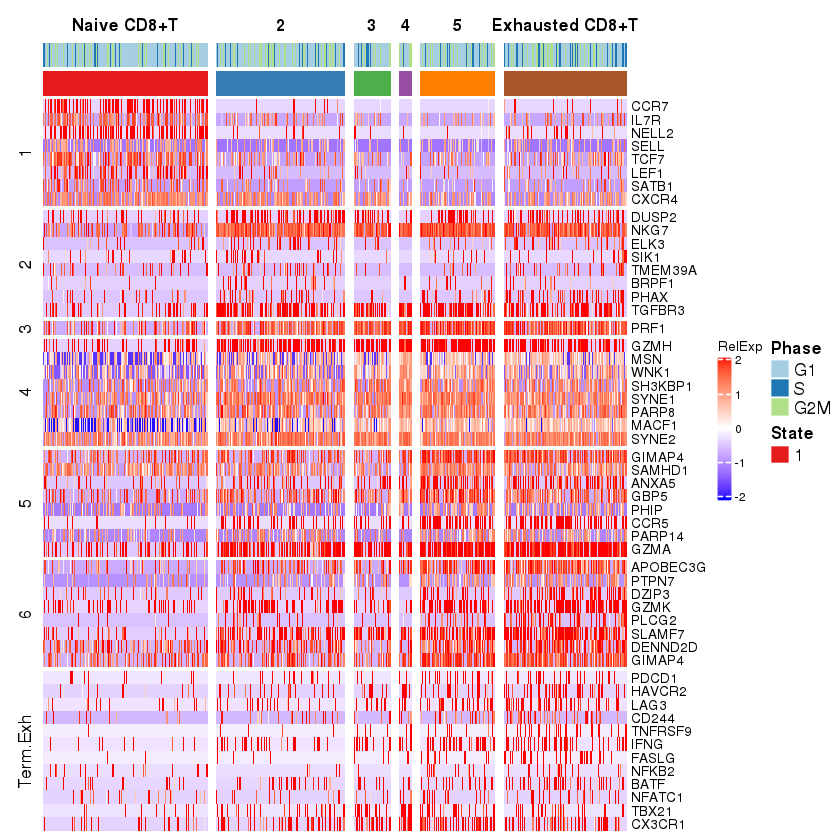

In [81]:
state1_markers <- c("CCR7","IL7R","NELL2","SELL","TCF7","LEF1","SATB1","CXCR4")
length(state1_markers)
state2_markers <- c("DUSP2","NKG7","ELK3","SIK1","TMEM39A","BRPF1","PHAX","TGFBR3")
length(state2_markers)
state3_markers <- c("PRF1")
length(state3_markers)
state4_markers <- c("GZMH","MSN","WNK1","SH3KBP1","SYNE1","PARP8","MACF1","SYNE2")
length(state4_markers)
state5_markers <- c("GIMAP4","SAMHD1","ANXA5","GBP5","PHIP","CCR5","PARP14","GZMA")
length(state5_markers)
state6_markers <- c("APOBEC3G","PTPN7","DZIP3","GZMK","PLCG2","SLAMF7","DENND2D","GIMAP4")
length(state6_markers)
terminal_specific <- c("PDCD1","HAVCR2","LAG3","CD244","TNFRSF9","IFNG","FASLG","NFKB2","BATF","NFATC1","TBX21","CX3CR1")

length(terminal_specific)

combined_markers <- c(state1_markers,state2_markers,state3_markers,state4_markers,state5_markers,state6_markers,terminal_specific)
length(combined_markers)


combined_cluster_logcounts_scaled <- assay(onlyCD8_cells,"scaledval")
combined_cluster_logcounts_scaled_required <- combined_cluster_logcounts_scaled[combined_markers,]
combined_cluster_logcounts_scaled_required[combined_cluster_logcounts_scaled_required < -2] = -2
combined_cluster_logcounts_scaled_required[combined_cluster_logcounts_scaled_required > 2] = 2

split <- factor(c(rep("1",8),rep("2",8),rep("3",1),rep("4",8),rep("5",8),rep("6",8),rep("Term.Exh",12)), levels=c("1","2","3","4","5","6","Term.Exh"))

state1_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "1")]
state1_cells_ordered <- state1_cells[order(state1_cells$monocle_state)]
state1_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state1_cells_ordered)]
dim(state1_ordered)
state2_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "2")]
state2_cells_ordered <- state2_cells[order(state2_cells$monocle_state)]
state2_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state2_cells_ordered)]
dim(state2_ordered)

state3_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "3")]
state3_cells_ordered <- state3_cells[order(state3_cells$monocle_state)]
state3_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state3_cells_ordered)]
dim(state3_ordered)

state4_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "4")]
state4_cells_ordered <- state4_cells[order(state4_cells$monocle_state)]
state4_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state4_cells_ordered)]
dim(state4_ordered)

state5_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "5")]
state5_cells_ordered <- state5_cells[order(state5_cells$monocle_state)]
state5_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state5_cells_ordered)]
dim(state5_ordered)

state6_cells <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state == "6")]
state6_cells_ordered <- state6_cells[order(state6_cells$monocle_state)]
state6_ordered <- combined_cluster_logcounts_scaled_required[,colnames(state6_cells_ordered)]
dim(state6_ordered)


df_c1 = data.frame(type = c(rep("1", 155)))
hb <- HeatmapAnnotation(df = data.frame(Phase = state1_cells_ordered$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("1" = "#e41a1c")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10))
state1_heatmap <- Heatmap(state1_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "Naive CD8+T", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = FALSE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))


df_c1 = data.frame(type = c(rep("2", 121)))
hb <- HeatmapAnnotation(df = data.frame(Phase = state2_cells_ordered$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("2" = "#377eb8")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10))
state2_heatmap <- Heatmap(state2_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "2", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("3", 34)))
hb <- HeatmapAnnotation(df = data.frame(Phase = state3_cells_ordered$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("3" = "#4daf4a")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10))
state3_heatmap <- Heatmap(state3_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "3", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("4", 11)))
hb <- HeatmapAnnotation(df = data.frame(Phase = state4_cells_ordered$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("4" = "#984ea3")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10))
state4_heatmap <- Heatmap(state4_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "4", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("5", 70)))
hb <- HeatmapAnnotation(df = data.frame(Phase = state5_cells_ordered$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("5" = "#ff7f00")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10))
state5_heatmap <- Heatmap(state5_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "5", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

df_c1 = data.frame(type = c(rep("6", 115)))
hb <- HeatmapAnnotation(df = data.frame(Phase = state6_cells_ordered$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("6" = "#a65628")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10))
state6_heatmap <- Heatmap(state6_ordered, split = split,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "Exhausted CD8+T", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))

all_combined_heatmap <- state1_heatmap + state2_heatmap + state3_heatmap + state4_heatmap + state5_heatmap + state6_heatmap

all_combined_heatmap

class: SingleCellExperiment 
dim: 53916 506 
metadata(0):
assays(4): counts logcounts logcounts_raw scaledval
rownames(53916): TSPAN6 TNMD ... ENSG00000273492 ENSG00000273493
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(506):
  X180831_NB501311_0292_AHW2LCBGX7_PBMC_Tcell_Donor5_080818_plate1_E6_S141_rep1_NA
  X181012_NB501311_0316_AH57JJBGX9_DEANTA2_CD8_Tcell_092818_plate1_H3_S24_rep1_NA
  ...
  X180120_NB501311_0183_AH3GG3BGX5_DEANTA4_TALL_010218_plate1_B2_rep_1_NA
  X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092418_plate1_H2_S208_rep1_NA
colData names(77): sampleName SeqDate ... norm_exhaustion_score
  norm_cytotoxic_score
reducedDimNames(5): allPCApd oldtSNE pagoda_largeVIS pagoda_tSNE
  monocle_traj
spikeNames(4): MT RP HKG RNA5S

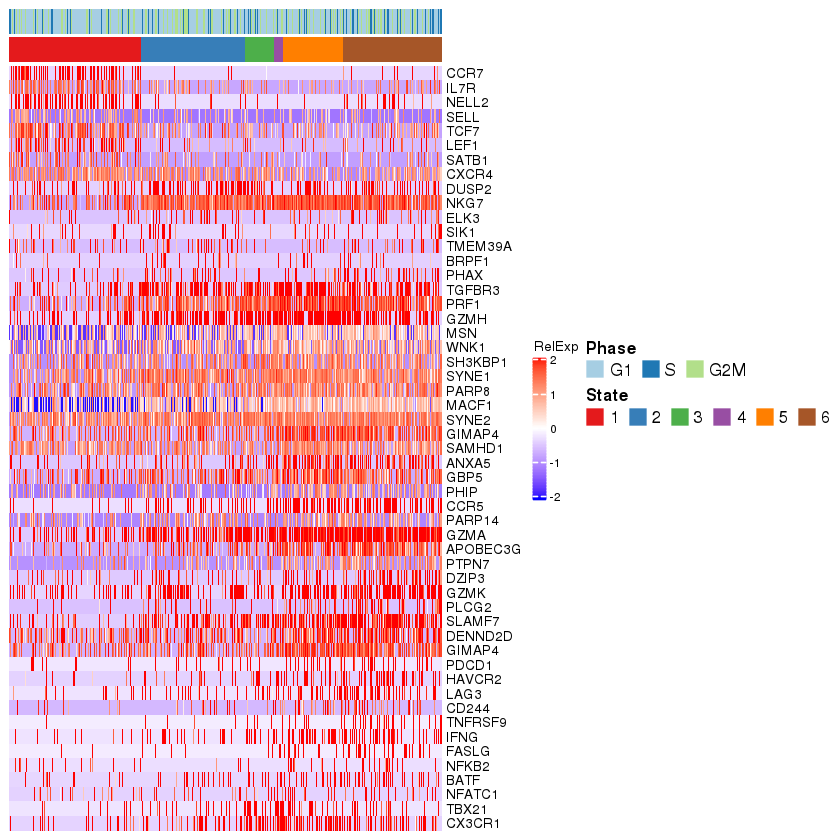

In [101]:
combined_ordered <- cbind(state1_ordered,state2_ordered,state3_ordered,state4_ordered,state5_ordered,state6_ordered)
combined_ordered_data <- onlyCD8_cells[,colnames(combined_ordered)]
combined_ordered_data

combined_cluster_logcounts_scaled <- assay(combined_ordered_data,"scaledval")
combined_cluster_logcounts_scaled_required <- combined_cluster_logcounts_scaled[combined_markers,]
combined_cluster_logcounts_scaled_required[combined_cluster_logcounts_scaled_required < -2] = -2
combined_cluster_logcounts_scaled_required[combined_cluster_logcounts_scaled_required > 2] = 2

df_c1 = data.frame(type = combined_ordered_data$monocle_state)
hb <- HeatmapAnnotation(df = data.frame(Phase = combined_ordered_data$Phase, State = df_c1$type), col = list(Phase = c("G1" = "#a6cee3", "S" = "#1f78b4","G2M" = "#b2df8a"), State = c("1" = "#e41a1c","2"="#377eb8","3"="#4daf4a","4"="#984ea3","5"="#ff7f00","6"="#a65628")),gap = unit(1, "mm"),show_annotation_name=FALSE, annotation_height = unit(c(rep(0.25,2)), "cm"),show_legend = c(TRUE,TRUE),annotation_name_gp = gpar(col = "black",fontsize=10),    annotation_legend_param = list(
        Phase = list(nrow = 1),
        State = list(nrow = 1)))
state_heatmap <- Heatmap(combined_cluster_logcounts_scaled_required,name = "Rel.Exp",show_column_names = FALSE,cluster_columns = FALSE,cluster_rows = FALSE, column_title = "", column_title_gp = gpar(fontsize = 10, fontface = "bold"),col=col_fun,top_annotation = hb, show_row_names = TRUE, row_names_gp = gpar(fontsize = 8),row_title_gp = gpar(col = "black",fontsize=10), heatmap_legend_param = list(title = "RelExp",legend_height = unit(3, "cm"),grid_width = unit(0.25, "cm"),labels_gp = gpar(col = "black", fontsize = 7),title_gp = gpar(fontsize = 8)))
state_heatmap

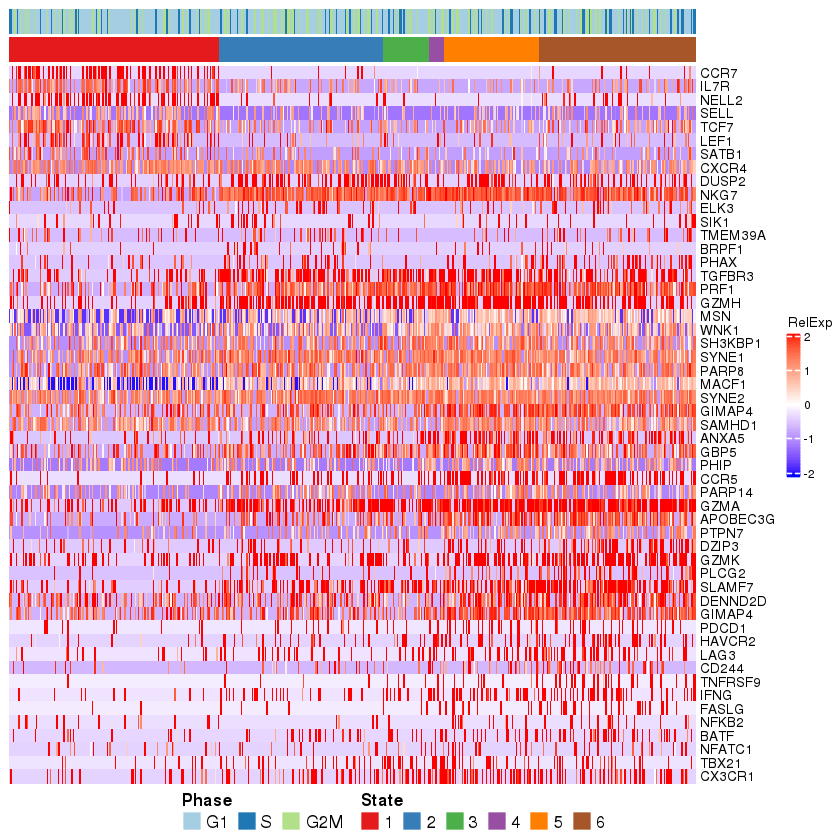

In [102]:
draw(state_heatmap,annotation_legend_side = "bottom")

In [104]:
pdf("./Broad_presentation_figures/Final_Exhaustion_marker_trajectory.pdf",width=7.4,height=4.5)
draw(state_heatmap,annotation_legend_side = "bottom")
dev.off()

X11cairo 
       2

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

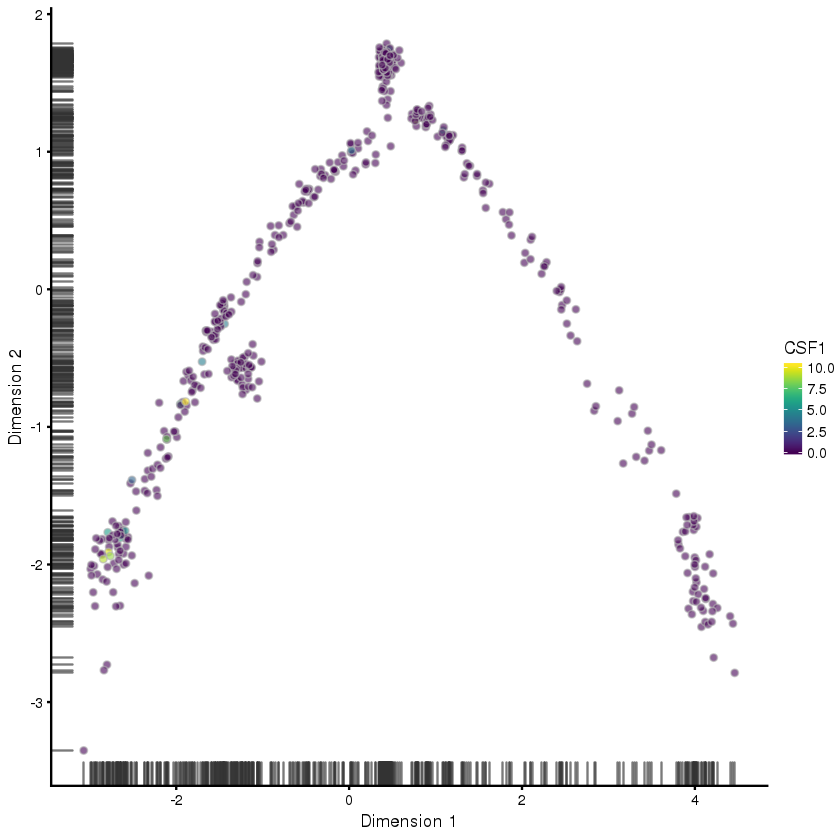

In [37]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "CSF1")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

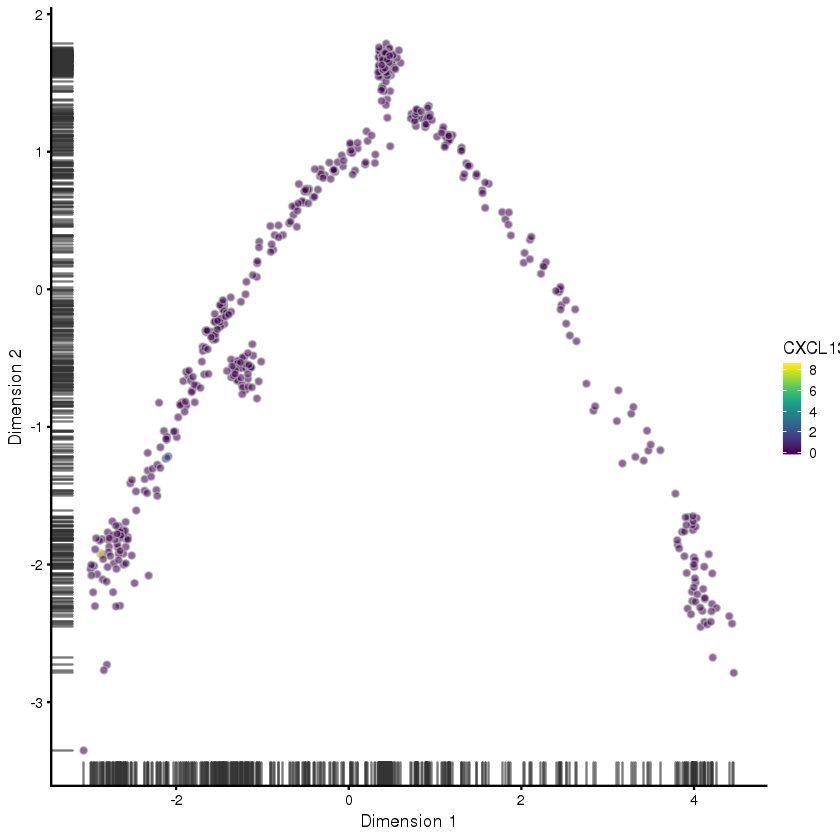

In [19]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "CXCL13")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

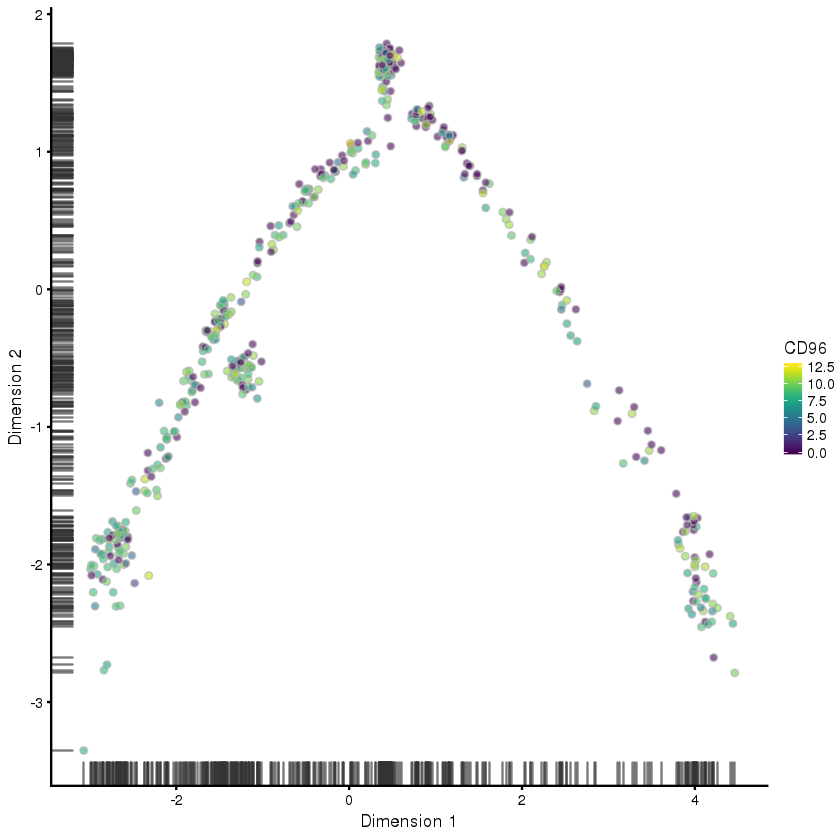

In [3]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "CD96")

In [3]:
table(onlyCD8_cells$monocle_state,onlyCD8_cells$treatment)

   
    Treated Untreated
  1      34       121
  2      31        90
  3       6        28
  4       1        10
  5      19        51
  6      26        89
  7       8        34

In [10]:
color_factor_days <- function(rdsfile,factor_vector,title){
    df <- as.data.frame(reducedDims(rdsfile)$monocle_traj)
    colnames(df) <- c("Component1","Component2")
    df$Component1 <- as.numeric(as.character(df$Component1))
    df$Component2 <- as.numeric(as.character(df$Component2))
    rownames(df) <- c()
    tSNEplot <- ggplot(df, aes(x=df$Component1, df$Component2)) + geom_point(aes(colour = factor_vector),alpha = 0.75,size=0.5) + 
    ylab("Component2") + xlab("Component1") + 
    theme_update(plot.title = element_text(hjust = 0.5)) + 
    ggtitle(title) + theme(legend.title=element_blank()) + theme(axis.line=element_blank(),axis.text.x=element_blank(),
          axis.text.y=element_blank(),axis.ticks=element_blank(),
          panel.background=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank(), panel.border = element_rect(colour = "gray", fill=NA, size=1)) + scale_color_manual(breaks = c("1day", "3days","8days","10days","15days","None"), values=c("#e41a1c", "#377eb8","#4daf4a","#984ea3","#ff7f00","#E0E0E0")) + theme(legend.position = "top")
    return(tSNEplot)
}

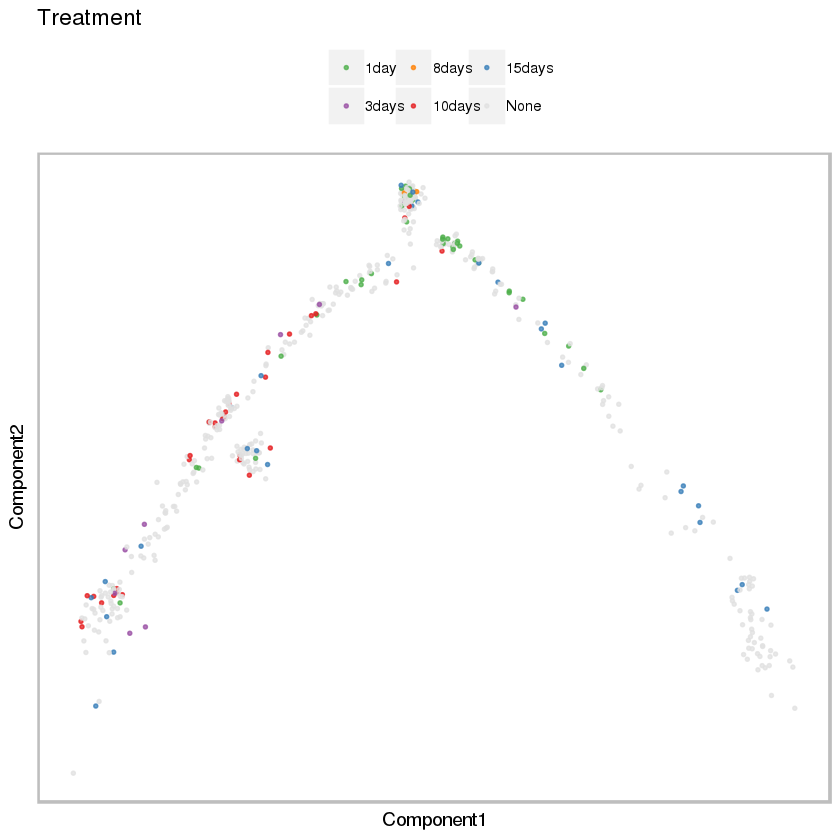

In [12]:
color_factor_days(onlyCD8_cells,onlyCD8_cells$TD,"Treatment")

In [15]:
required_data <- readRDS("~/BioConductor_simpleSingleCell/New_with2patient_norm/DEANTA_velocyto_info_embedded.rds")
required_data

class: SingleCellExperiment 
dim: 25476 3538 
metadata(0):
assays(8): counts logcounts ... spanning matrix
rownames(25476): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(3538):
  X170922_NB501311_0127_AHLGV5BGX3_DEANTA2.3_TALL_090117_plate5_A10_rep_1_NA
  X170922_NB501311_0127_AHLGV5BGX3_DEANTA2.3_TALL_090117_plate5_A11_rep_1_NA
  ...
  X180206_NB501311_0191_AHJJYHBGX5_DEANTA4RS_TALL_010218_plate2_H3_rep_1_NA
  X180206_NB501311_0191_AHJJYHBGX5_DEANTA4RS_TALL_010218_plate2_H4_rep_1_NA
colData names(73): sampleName SeqDate ... pagoda_multilevel Louvain
reducedDimNames(14): allPCApd oldtSNE ... umap phate
spikeNames(4): MT RP HKG RNA5S

In [17]:
required_cols <- which(colnames(required_data) %in% colnames(onlyCD8_cells))

In [20]:
write.csv(required_cols,"./Broad_presentation_figures/CD8_cols.csv")

In [21]:
length(required_cols)

[1] 546

In [22]:
onlyCD8_cells

class: SingleCellExperiment 
dim: 53916 548 
metadata(0):
assays(4): counts logcounts logcounts_raw scaledval
rownames(53916): TSPAN6 TNMD ... ENSG00000273492 ENSG00000273493
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(548):
  X170328_NB501311_0063_AHHHJ3BGX2_DEANTA3.1_TALL_040716_plate7_E3_rep_1_NA
  X181005_NB501311_0312_AH2WG2BGX9_DEANTA0_CD8_Tcell_092418_plate1_B1_S290_rep1_NA
  ...
  X180706_NB501311_0266_AH552FBGX7_PBMC_TBMG_070218_plate1_B3_S17_rep1_NA
  X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092818_plate1_B2_S106_rep1_NA
colData names(78): sampleName SeqDate ... norm_cytotoxic_score TD
reducedDimNames(5): allPCApd oldtSNE pagoda_largeVIS pagoda_tSNE
  monocle_traj
spikeNames(4): MT RP HKG RNA5S

In [24]:
write.csv(reducedDims(onlyCD8_cells)$monocle_traj,"./Broad_presentation_figures/Monocle_trajectory_onlyCD8cells.csv")

In [25]:
`%nin%` = Negate(`%in%`)

In [26]:
which(colnames(onlyCD8_cells) %nin% colnames(required_data))

[1] 229 391

In [27]:
colnames(onlyCD8_cells)[which(colnames(onlyCD8_cells) %nin% colnames(required_data))]

[1] "X171006_NB501311_0134_AHMKGCBGX3_DEANTA3_TALL_091817_plate2_A5_rep_1_NA"  
[2] "X170328_NB501311_0063_AHHHJ3BGX2_DEANTA3.1_TALL_040716_plate7_G3_rep_1_NA"

In [28]:
write.csv(colData(onlyCD8_cells),"./Broad_presentation_figures/OnlyCD8cells_exhaustion_alldata.csv")

In [34]:
all_states <- rep("None",length(colnames(all_states)))
all_states[which(onlyCD8_cells$monocle_state == "1")] = "state1"
all_states[which(onlyCD8_cells$monocle_state == "2")] = "state2"
all_states[which(onlyCD8_cells$monocle_state == "3")] = "state3"
all_states[which(onlyCD8_cells$monocle_state == "4")] = "state4"
all_states[which(onlyCD8_cells$monocle_state == "5")] = "state5"
all_states[which(onlyCD8_cells$monocle_state == "6")] = "state6"
all_states[which(onlyCD8_cells$monocle_state == "7")] = "state7"
table(all_states)

all_states
state1 state2 state3 state4 state5 state6 state7 
   155    121     34     11     70    115     42 

In [35]:
colData(onlyCD8_cells)$monocle_state <- all_states

In [36]:
write.csv(colData(onlyCD8_cells),"./Broad_presentation_figures/OnlyCD8cells_exhaustion_alldata.csv")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

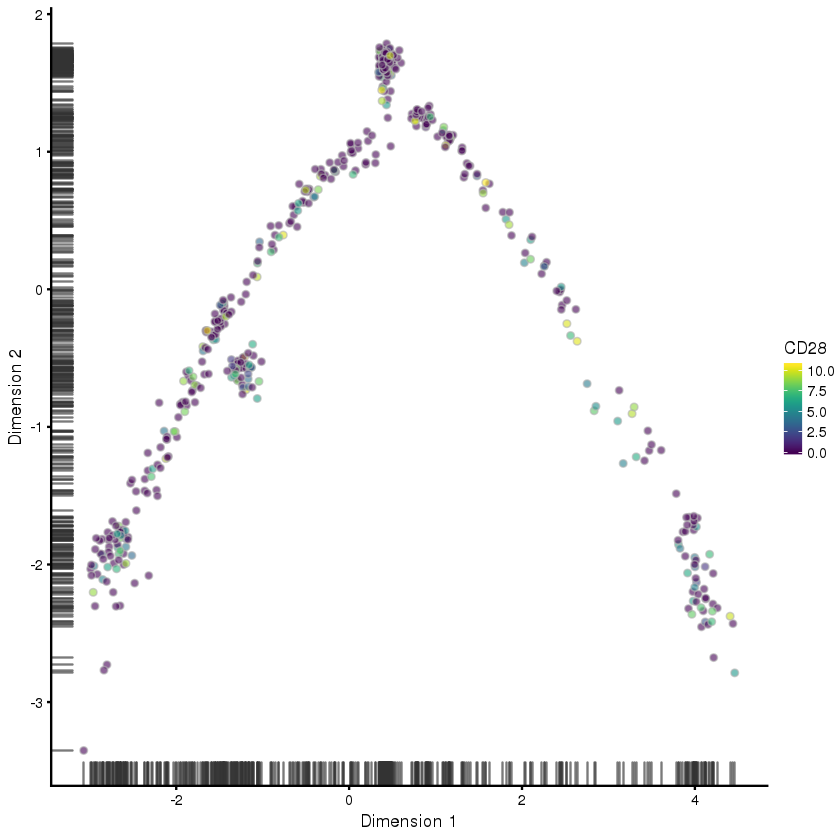

In [6]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "CD28")

Warning message:
“'add_ticks' is deprecated.
Use '+ geom_rug(...)' instead.”

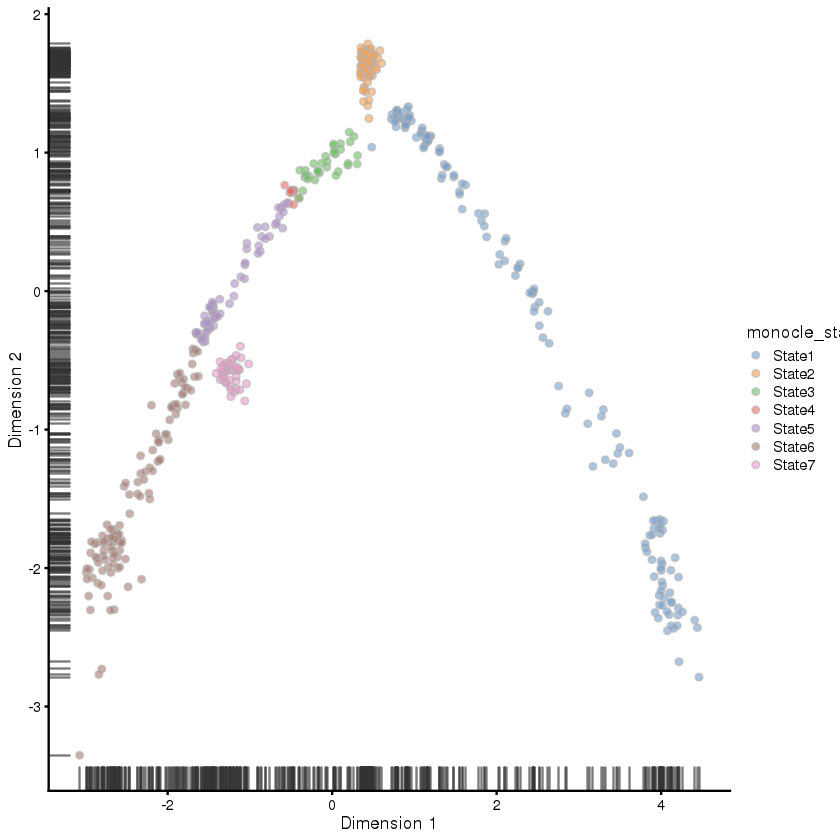

In [4]:
plotReducedDim(onlyCD8_cells,"monocle_traj", by_exprs_values = "logcounts", ncomponents = 2,colour_by = "monocle_state")

In [5]:
required_clusters <- c("State5","State6")

In [6]:
only_state5_state6 <- onlyCD8_cells[,which(onlyCD8_cells$monocle_state %in% required_clusters)]
only_state5_state6

class: SingleCellExperiment 
dim: 53916 185 
metadata(0):
assays(4): counts logcounts logcounts_raw scaledval
rownames(53916): TSPAN6 TNMD ... ENSG00000273492 ENSG00000273493
rowData names(19): is_feature_control_MT is_feature_control_RP ...
  total_counts log10_total_counts
colnames(185):
  X181012_NB501311_0316_AH57JJBGX9_DEANTA2.10_CD8_Tcell_092418_plate1_D7_S244_rep1_NA
  X180120_NB501311_0183_AH3GG3BGX5_DEANTA4.15_TALL_010818_plate1_B8_rep_1_NA
  ...
  X180120_NB501311_0183_AH3GG3BGX5_DEANTA4_TALL_010218_plate1_B2_rep_1_NA
  X181012_NB501311_0316_AH57JJBGX9_DEANTA4_CD8_Tcell_092418_plate1_H2_S208_rep1_NA
colData names(77): sampleName SeqDate ... norm_exhaustion_score
  norm_cytotoxic_score
reducedDimNames(5): allPCApd oldtSNE pagoda_largeVIS pagoda_tSNE
  monocle_traj
spikeNames(4): MT RP HKG RNA5S

In [7]:
table(only_state5_state6$monocle_state)


State5 State6 
    70    115 

In [9]:
monocle_state_markers <- findMarkers(assay(only_state5_state6,"logcounts"),only_state5_state6$monocle_state, pval.type=c("any","all"),direction=c("any"),subset.row=NULL)

In [10]:
names(monocle_state_markers)

[1] "State5" "State6"

In [14]:
head(monocle_state_markers$State5)

DataFrame with 6 rows and 4 columns
                Top              p.value               FDR      logFC.State6
          <integer>            <numeric>         <numeric>         <numeric>
TLE3              1  7.3205945021667e-06  0.39469717317882  -1.7125293859296
LINC00674         2 2.43291837650077e-05 0.633593761644259 -1.12578282240625
KIAA0355          3 5.83196773398226e-05 0.633593761644259 -1.26271428973965
PSMB5             4 6.50123658338281e-05 0.633593761644259 -1.16453538138082
ITPKB             5 8.73497418573486e-05 0.633593761644259 -1.79425536781625
DUT               6 9.03663045353284e-05 0.633593761644259 -1.22091495895108